# Problem Statement - I

# Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

# The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

# When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

 

# Import the Library


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',300)


# 1) Data Cleaning 

Data reading and data types



In [4]:
df1=pd.read_csv('application_data.csv')

df2=pd.read_csv('previous_application (1).csv')

In [5]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [7]:
print(df1.shape)

print(df2.shape)

(307511, 122)
(1670214, 37)


In [8]:
df1.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

# Calculate the Percentage of Missing Value in Previous Application Data Frame

In [9]:
New_value= df2.isnull().sum()*100/len(df2)
New_value.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [10]:
# Cols_To_Drops = list(df2.columns[100*df2.isnull().mean()>40])
# print(cols_for_drops)
# print(len(cols_for_drops))
# df1.drop(cols_for_drops,axis=1,inplace=True)
# Columns_to_work = round(100*(df1.isnull().sum()/len(df1.index)),2).sort_values(ascending=False)
# print(Columns_to_work)
# print(len(Columns_to_work))

In [11]:
df2 = df2.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis=1)

In [12]:
df2.isnull().sum().sort_values(ascending=False)

NAME_TYPE_SUITE                820405
DAYS_FIRST_DRAWING             673065
DAYS_TERMINATION               673065
DAYS_LAST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION      673065
DAYS_FIRST_DUE                 673065
NFLAG_INSURED_ON_APPROVAL      673065
AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
NAME_CONTRACT_TYPE                  0
AMT_APPLICATION                     0
NAME_YIELD_GROUP                    0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
SK_ID_CURR                          0
CODE_REJECT_REASON                  0
NAME_PAYMENT

In [13]:

value= df2.isnull().sum()*100/len(df2)
value.sort_values(ascending=False)

NAME_TYPE_SUITE                49.119754
DAYS_FIRST_DRAWING             40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_CURR      

In [14]:
Cols_To_Drops = list(df2.columns[100*df2.isnull().mean()>40])
print(Cols_To_Drops)

['NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [15]:
df2.drop(Cols_To_Drops,axis=1,inplace=True)
100*df2.isnull().mean()


SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [16]:
df2.AMT_ANNUITY.isnull().sum()

372235

In [17]:
df2.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

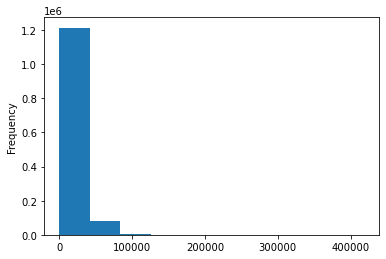

In [18]:
df2.AMT_ANNUITY.plot.hist()
plt.show()

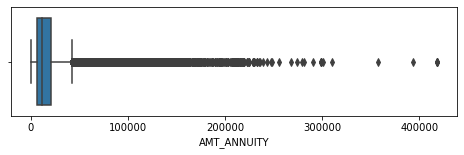

In [19]:
plt.figure(figsize=[8,2])
sns.boxplot(df2.AMT_ANNUITY)
plt.show()

In [20]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [21]:
df2.AMT_ANNUITY.median()

11250.0

In [22]:
# df2.AMT_ANNUITY.value_counts().plot.bar()

In [23]:
df2.AMT_ANNUITY.fillna(11250.0,inplace=True )
df2.AMT_ANNUITY.isnull().sum()

0

In [24]:
df2.AMT_GOODS_PRICE              

0           17145.0
1          607500.0
2          112500.0
3          450000.0
4          337500.0
             ...   
1670209    267295.5
1670210     87750.0
1670211    105237.0
1670212    180000.0
1670213    360000.0
Name: AMT_GOODS_PRICE, Length: 1670214, dtype: float64

In [25]:
df2.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:ylabel='Frequency'>

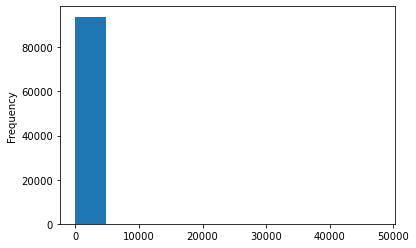

In [26]:
df2.AMT_GOODS_PRICE.value_counts().plot.hist()

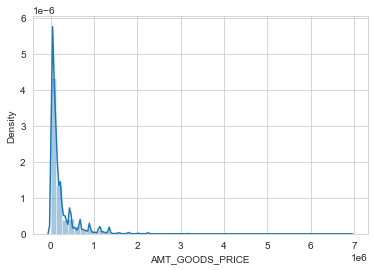

In [27]:
sns.set_style('whitegrid') 
sns.distplot(df2['AMT_GOODS_PRICE']) 
plt.show()

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

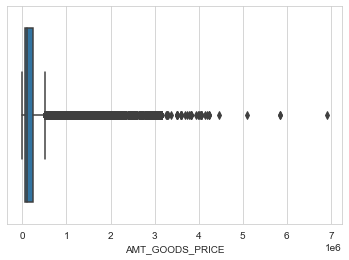

In [28]:
sns.boxplot(df2.AMT_GOODS_PRICE)

In [29]:
df2.AMT_GOODS_PRICE.median()

112320.0

In [30]:
df2.AMT_GOODS_PRICE.fillna(112320.0,inplace =True )
df2.AMT_GOODS_PRICE.isnull().sum()

0

In [31]:
df2.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [32]:
df2.CNT_PAYMENT                  

0          12.0
1          36.0
2          12.0
3          12.0
4          24.0
           ... 
1670209    30.0
1670210    12.0
1670211    10.0
1670212    12.0
1670213    48.0
Name: CNT_PAYMENT, Length: 1670214, dtype: float64

In [33]:
df2.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [34]:
df2.CNT_PAYMENT.median()

12.0

<AxesSubplot:ylabel='Frequency'>

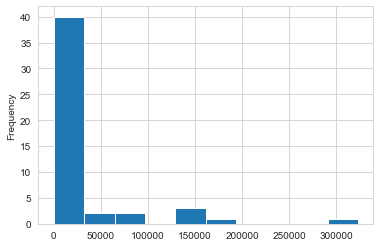

In [35]:
df2.CNT_PAYMENT.value_counts().plot.hist()

<AxesSubplot:xlabel='CNT_PAYMENT'>

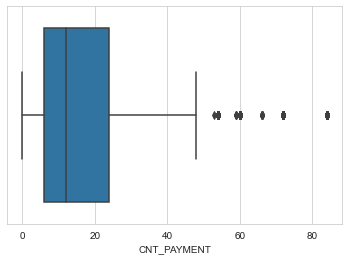

In [36]:
sns.boxplot(df2.CNT_PAYMENT)

In [37]:
df2.CNT_PAYMENT.fillna(12.0,inplace = True)
df2.CNT_PAYMENT.isnull().sum()

0

In [38]:
df2.PRODUCT_COMBINATION               

0             POS mobile with interest
1                     Cash X-Sell: low
2                    Cash X-Sell: high
3                  Cash X-Sell: middle
4                    Cash Street: high
                      ...             
1670209     POS industry with interest
1670210     POS industry with interest
1670211    POS household with interest
1670212               Cash X-Sell: low
1670213            Cash X-Sell: middle
Name: PRODUCT_COMBINATION, Length: 1670214, dtype: object

<AxesSubplot:>

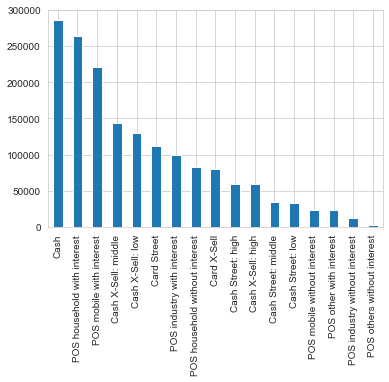

In [39]:
df2.PRODUCT_COMBINATION.value_counts().plot.bar()

In [40]:
df2.PRODUCT_COMBINATION.fillna('Cash',inplace =True)
df2.PRODUCT_COMBINATION.isnull().sum()

0

In [41]:
df2.AMT_CREDIT                          

0           17145.0
1          679671.0
2          136444.5
3          470790.0
4          404055.0
             ...   
1670209    311400.0
1670210     64291.5
1670211    102523.5
1670212    191880.0
1670213    360000.0
Name: AMT_CREDIT, Length: 1670214, dtype: float64

In [42]:
df2.AMT_CREDIT.describe()                         

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:xlabel='AMT_CREDIT'>

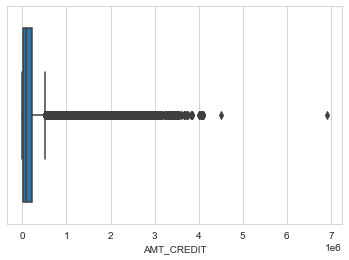

In [43]:
sns.boxplot(df2.AMT_CREDIT)                          

In [44]:
df2.AMT_CREDIT.median()

80541.0

In [45]:
df2.AMT_CREDIT.fillna(80541.0,inplace =True)
df2.AMT_CREDIT.isnull().sum()

0

In [46]:
df2.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

# Separating Numerical and Categorical Columns From Previous_Application Data Frame


In [47]:
Obj_dtypes_2 = [i for i in df2.select_dtypes(include=np.object).columns if i not in ["type"] ]

Num_dtypes_2 = [i for i in df2.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + 
              [ 'TARGET']]

In [48]:
Obj_dtypes_2

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [49]:
Num_dtypes_2

['SK_ID_PREV',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

In [50]:
total_col = len(Obj_dtypes_2)+len(Num_dtypes_2)
total_col

25

In [51]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [52]:
df2.shape

(1670214, 26)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

# Calculate the Percentage of Missing Value in  Application Data Frame

In [54]:
round(100*(df1.isnull().sum()/len(df1.index)),2).sort_values(ascending = False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [56]:
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# Removing columns with missing values more than 40%

In [57]:


cols_for_drops = list(df1.columns[100*df1.isnull().mean()>40])
print(cols_for_drops)
print(len(cols_for_drops))
df1.drop(cols_for_drops,axis=1,inplace=True)
Columns_to_work = round(100*(df1.isnull().sum()/len(df1.index)),2).sort_values(ascending=False)
print(Columns_to_work)
print(len(Columns_to_work))

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [58]:
cols_for_drops

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [59]:
Columns_to_work= list(round(100*(df1.isnull().sum()/len(df1.index)),2).sort_values(ascending = False))
len(Columns_to_work)

73

In [60]:
df1.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

In [61]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41519

In [62]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.median()

1.0

In [63]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.describe()


count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [64]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR

0         1.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    1.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 307511, dtype: float64

In [65]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [66]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(1.0, inplace= True)
df1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize= True)

1.0     0.341204
0.0     0.233491
2.0     0.163220
3.0     0.109355
4.0     0.067360
5.0     0.039192
6.0     0.022656
7.0     0.012582
8.0     0.006917
9.0     0.003564
11.0    0.000101
12.0    0.000098
10.0    0.000072
13.0    0.000062
14.0    0.000033
17.0    0.000023
15.0    0.000020
19.0    0.000013
18.0    0.000013
16.0    0.000010
25.0    0.000003
23.0    0.000003
22.0    0.000003
21.0    0.000003
20.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

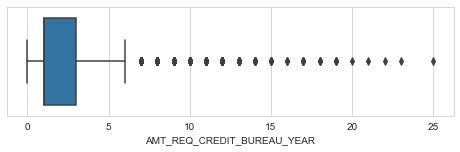

In [67]:

plt.figure(figsize=[8,2])
sns.boxplot(df1.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

In [68]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

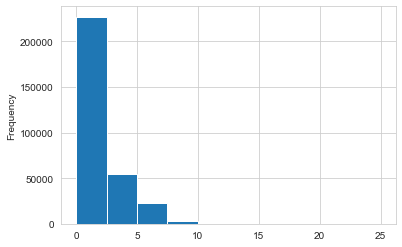

In [69]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.plot.hist()
plt.show()

In [70]:
df1.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

In [71]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.median()

1.0

In [72]:
Obj_dtypes_1 = [i for i in df1.select_dtypes(include=np.object).columns if i not in ["type"] ]
Num_dtypes_1 = [i for i in df1.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]             

In [73]:
Obj_dtypes_1  

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [74]:
len(Obj_dtypes_1)

12

In [75]:
Num_dtypes_1

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13'

In [76]:
len(Num_dtypes_1)

59

In [77]:
Total_columns =len(Obj_dtypes_1)+len(Num_dtypes_1)
Total_columns

71

In [78]:
df1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [79]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.describe()     

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [80]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.median()

0.0

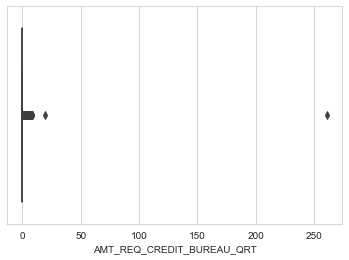

In [81]:
sns.boxplot(df1.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show()

In [82]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

41519

In [83]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.nunique()

11

In [84]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [85]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0.0,inplace = True)
df1.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

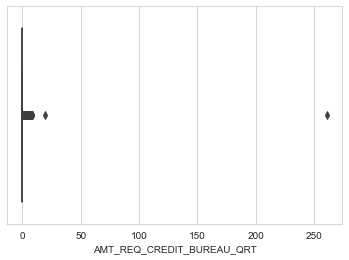

In [86]:
sns.boxplot(df1.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show()

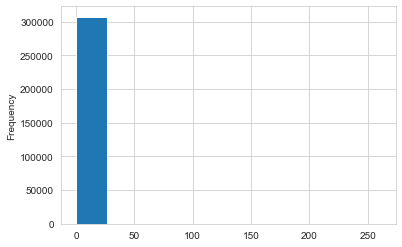

In [87]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.plot.hist()
plt.show()

In [88]:
df1.AMT_REQ_CREDIT_BUREAU_QRT

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, Length: 307511, dtype: float64

In [89]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.unique()

array([  0.,   1.,   2.,   4.,   3.,   8.,   5.,   6.,   7., 261.,  19.])

In [90]:
q1=df1["AMT_REQ_CREDIT_BUREAU_QRT"].describe()["25%"]
q3=df1["AMT_REQ_CREDIT_BUREAU_QRT"].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print(lower_bound,upper_bound)

0.0 0.0


In [91]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [92]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

In [93]:
df1.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41519

In [94]:
df1.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [95]:
df1.AMT_REQ_CREDIT_BUREAU_MON.median()

0.0

In [96]:
df1.AMT_REQ_CREDIT_BUREAU_MON.fillna(0.0,inplace = True)
df1.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

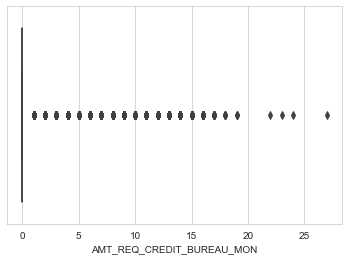

In [97]:
sns.boxplot(df1.AMT_REQ_CREDIT_BUREAU_MON)
plt.show()

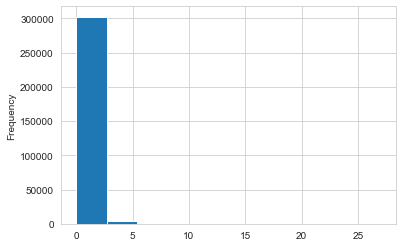

In [98]:
df1.AMT_REQ_CREDIT_BUREAU_MON.plot.hist()
plt.show()

In [99]:
df1.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [100]:
df1.AMT_REQ_CREDIT_BUREAU_WEEK.median()

0.0

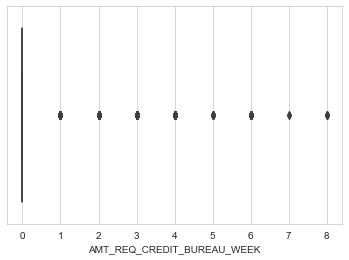

In [101]:
sns.boxplot(df1.AMT_REQ_CREDIT_BUREAU_WEEK)
plt.show()

In [102]:
df1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0.0,inplace = True)
df1.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

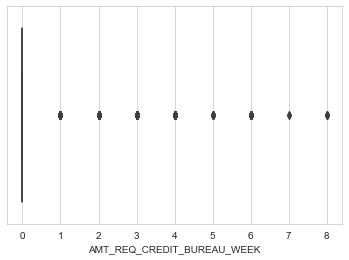

In [103]:
sns.boxplot(df1.AMT_REQ_CREDIT_BUREAU_WEEK)
plt.show()

In [104]:
df1.AMT_REQ_CREDIT_BUREAU_DAY.describe         

<bound method NDFrame.describe of 0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, Length: 307511, dtype: float64>

In [105]:
df1.AMT_REQ_CREDIT_BUREAU_DAY.median()

0.0

In [106]:
df1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(0.0,inplace = True)
df1.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

In [107]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

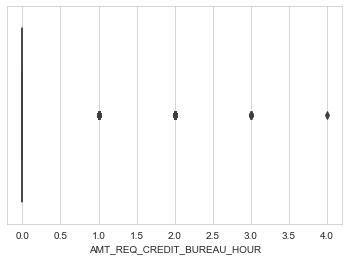

In [108]:
sns.boxplot(df1.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.show()

In [109]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR.median()

0.0

In [110]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0.0,inplace= True)
df1.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

In [111]:
Columns_to_work

[31.35,
 19.83,
 13.5,
 13.5,
 13.5,
 13.5,
 13.5,
 13.5,
 0.42,
 0.33,
 0.33,
 0.33,
 0.33,
 0.21,
 0.09,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [112]:
df1.EXT_SOURCE_3.describe()                 

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [113]:
df1.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

<AxesSubplot:xlabel='EXT_SOURCE_3'>

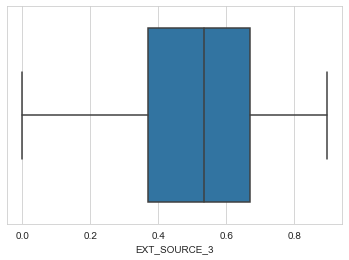

In [114]:
sns.boxplot(df1.EXT_SOURCE_3)

In [115]:
df1.EXT_SOURCE_3.median()

0.5352762504724826

In [116]:
df1.EXT_SOURCE_3.unique()

array([1.39375780e-01,            nan, 7.29566691e-01, 6.21226338e-01,
       4.92060094e-01, 5.40654450e-01, 7.51723715e-01, 3.63945239e-01,
       6.52896552e-01, 1.76652579e-01, 7.70087070e-01, 6.78567689e-01,
       6.21030378e-02, 5.56727426e-01, 4.77649155e-01, 5.42445144e-01,
       3.58951229e-01, 6.69056695e-01, 5.65607981e-01, 4.61482391e-01,
       1.90705948e-01, 6.59405532e-01, 5.24496446e-01, 4.10102573e-01,
       7.98137231e-01, 4.11848556e-01, 7.54406173e-01, 7.22392890e-01,
       6.05836265e-01, 3.20163367e-01, 3.99675616e-01, 6.84827659e-01,
       4.75849909e-01, 7.28141299e-01, 4.66864006e-01, 4.79448981e-01,
       3.09275356e-01, 7.99296783e-01, 7.01695774e-01, 7.38019620e-01,
       7.01088438e-02, 1.69428727e-01, 5.13693766e-01, 7.07699345e-01,
       3.39287700e-01, 6.97146908e-01, 4.34733249e-01, 2.34015167e-01,
       9.50703958e-02, 5.62060483e-01, 4.29423684e-01, 4.13596760e-01,
       8.32785025e-01, 3.94495405e-01, 5.97192427e-01, 6.94092643e-01,
      

In [117]:
df1.EXT_SOURCE_3.fillna(0.54,inplace= True)
df1.EXT_SOURCE_3.isnull().sum()

0

<AxesSubplot:xlabel='EXT_SOURCE_3'>

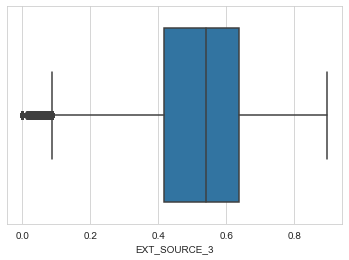

In [118]:
sns.boxplot(df1.EXT_SOURCE_3)

In [119]:
df1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [120]:
df1.NAME_TYPE_SUITE                 

0         Unaccompanied
1                Family
2         Unaccompanied
3         Unaccompanied
4         Unaccompanied
              ...      
307506    Unaccompanied
307507    Unaccompanied
307508    Unaccompanied
307509    Unaccompanied
307510    Unaccompanied
Name: NAME_TYPE_SUITE, Length: 307511, dtype: object

In [121]:
df1.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [122]:
df1.NAME_TYPE_SUITE.nunique()

7

In [123]:
df1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

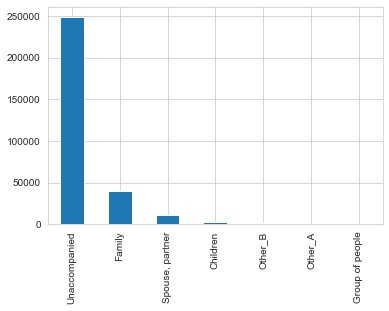

In [124]:
df1.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.show()

In [125]:
df1.NAME_TYPE_SUITE.isnull().sum()

1292

In [126]:
df1.NAME_TYPE_SUITE.fillna('Unaccompanied',inplace= True)
df1.NAME_TYPE_SUITE.isnull().sum()

0

In [127]:
df1.OCCUPATION_TYPE                

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507            NaN
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

In [128]:
df1.OCCUPATION_TYPE.nunique()               

18

In [129]:
df1.OCCUPATION_TYPE.unique() 

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

<AxesSubplot:>

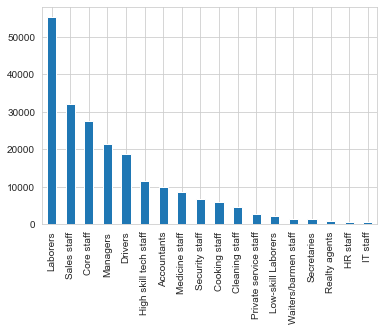

In [130]:
df1.OCCUPATION_TYPE.value_counts().plot.bar()

In [131]:
df1.OCCUPATION_TYPE.isnull().sum()

96391

In [132]:
df1.OCCUPATION_TYPE.fillna('Laborers',inplace = True)
df1.OCCUPATION_TYPE.isnull().sum()

0

In [133]:
df1.OBS_30_CNT_SOCIAL_CIRCLE        

0         2.0
1         1.0
2         0.0
3         2.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    6.0
307509    0.0
307510    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: float64

<AxesSubplot:ylabel='Frequency'>

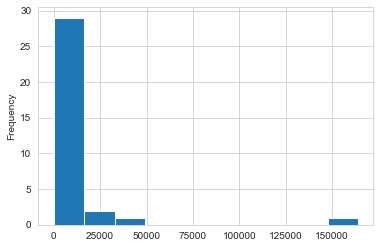

In [134]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().plot.hist()

In [135]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.median()

0.0

In [136]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:xlabel='OBS_30_CNT_SOCIAL_CIRCLE'>

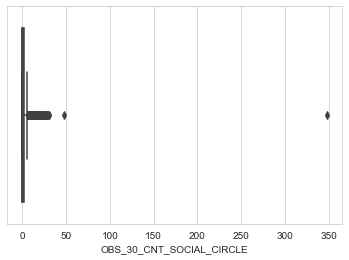

In [137]:
sns.boxplot(df1.OBS_30_CNT_SOCIAL_CIRCLE)

<AxesSubplot:ylabel='Frequency'>

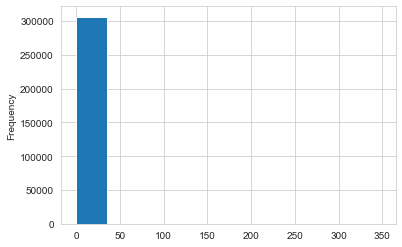

In [138]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.plot.hist()

In [139]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0.0,inplace = True)
df1.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

<AxesSubplot:xlabel='OBS_30_CNT_SOCIAL_CIRCLE'>

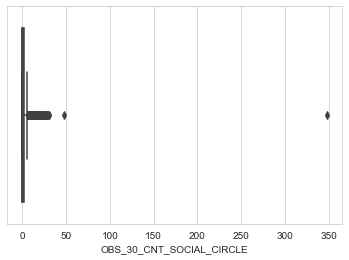

In [140]:
sns.boxplot(df1.OBS_30_CNT_SOCIAL_CIRCLE)

In [141]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [142]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.quantile([0.5, 0.7,0.8, 0.9, 0.95, 0.99])

0.50     0.0
0.70     2.0
0.80     3.0
0.90     4.0
0.95     6.0
0.99    10.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [143]:
df1[df1.OBS_30_CNT_SOCIAL_CIRCLE>6.0].describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   13518.000000  13518.000000  13518.000000      1.351800e+04   
mean   277990.426394      0.088845      0.433052      1.608863e+05   
std    102314.091914      0.284530      0.734028      8.442472e+04   
min    100022.000000      0.000000      0.000000      2.700000e+04   
25%    189912.750000      0.000000      0.000000      1.125000e+05   
50%    278158.500000      0.000000      0.000000      1.350000e+05   
75%    366189.000000      0.000000      1.000000      2.025000e+05   
max    456247.000000      1.000000      5.000000      1.890000e+06   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  1.351800e+04   13518.000000     1.350700e+04   
mean   6.011424e+05   26860.664447     5.412031e+05   
std    3.950638e+05   13670.426695     3.642634e+05   
min    4.500000e+04    2052.000000     4.500000e+04   
25%    2.763101e+05   16798.500000     2.385000e+05   
50%    5.212800e+05   24959.250000     4.500000e+05   
75%    8.086500e+05   34439.625000     6.795000e+05   
max    2.961000e+06  157869.000000     2.961000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                13518.000000  13518.000000   13518.000000   
mean                     0.020967 -16117.712827   68780.979509   
std                      0.011442   4515.652865  145312.342001   
min                      0.000533 -25192.000000  -16492.000000   
25%                      0.010966 -20025.750000   -2765.750000   
50%                      0.019689 -15728.000000   -1226.000000   
75%                      0.028663 -12261.000000    -265.000000   
max                      0.072508  -7676.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
count       13518.000000     13518.000000     13518.0    13518.000000   
mean        -4944.212162     -3072.212236         1.0        0.806332   
std          3562.080587      1486.503992         0.0        0.395186   
min        -22928.000000     -6226.000000         1.0        0.000000   
25%         -7421.000000     -4333.000000         1.0        1.000000   
50%         -4439.000000     -3371.000000         1.0        1.000000   
75%         -1933.250000     -1857.250000         1.0        1.000000   
max             0.000000        -1.000000         1.0        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  \
count     13518.000000      13518.000000  13518.000000  13518.000000   
mean          0.190561          0.998299      0.253736      0.056739   
std           0.392758          0.041215      0.435164      0.231352   
min           0.000000          0.000000      0.000000      0.000000   
25%           0.000000          1.000000      0.000000      0.000000   
50%           0.000000          1.000000      0.000000      0.000000   
75%           0.000000          1.000000      1.000000      0.000000   
max           1.000000          1.000000      1.000000      1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count     13518.000000          13518.000000                 13518.000000   
mean          2.203432              2.086477                     2.057627   
std           0.905972              0.452354                     0.443618   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max           7.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             13518.000000                13518.000000   
mean                 11.991123                    0.009691   
std                   3.155333                    0.097967   
min                   0.000000         

In [144]:
df1.OBS_30_CNT_SOCIAL_CIRCLE.median()
df1.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0.0,inplace =True)
df1.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

<AxesSubplot:xlabel='DEF_30_CNT_SOCIAL_CIRCLE'>

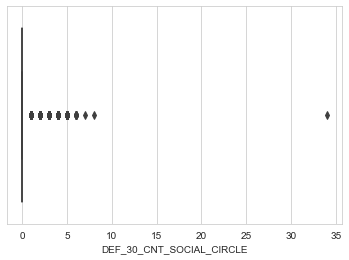

In [145]:
# sns.boxplot(df1.DEF_30_CNT_SOCIAL_CIRCLE,df1.OBS_60_CNT_SOCIAL_CIRCLE,df1.DEF_60_CNT_SOCIAL_CIRCLE)
sns.boxplot(df1.DEF_30_CNT_SOCIAL_CIRCLE)


In [146]:
df1.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [147]:
df1.DEF_30_CNT_SOCIAL_CIRCLE.median()

0.0

In [148]:
df1.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0.0,inplace =True)
df1.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

<AxesSubplot:xlabel='OBS_60_CNT_SOCIAL_CIRCLE'>

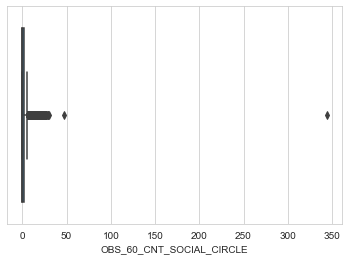

In [149]:
sns.boxplot(df1.OBS_60_CNT_SOCIAL_CIRCLE)

In [150]:
df1.OBS_60_CNT_SOCIAL_CIRCLE.median()

0.0

In [151]:
df1.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0.0,inplace =True)
df1.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [152]:
df1.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [153]:
df1.DEF_60_CNT_SOCIAL_CIRCLE.median()

0.0

In [154]:
df1.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0.0,inplace =True)
df1.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

<AxesSubplot:xlabel='DEF_60_CNT_SOCIAL_CIRCLE'>

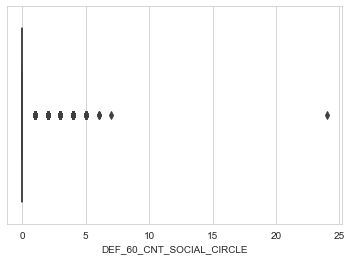

In [155]:
sns.boxplot(df1.DEF_60_CNT_SOCIAL_CIRCLE)

In [156]:
df1.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
OCCUPATION_TYPE                  0
CNT_FAM_MEMBERS     

In [157]:
df1.AMT_GOODS_PRICE                 

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

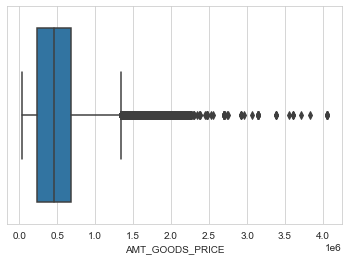

In [158]:
sns.boxplot(df1.AMT_GOODS_PRICE)

In [159]:
df1.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [160]:
df1.AMT_GOODS_PRICE.median()

450000.0

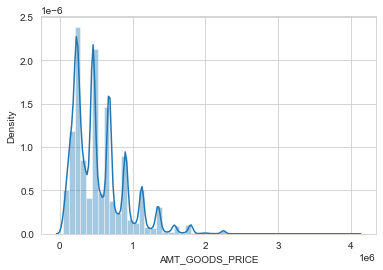

In [161]:
sns.set_style('whitegrid') 
sns.distplot(df1['AMT_GOODS_PRICE']) 
plt.show()

In [162]:
df1.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [163]:
df1.AMT_GOODS_PRICE.fillna(450000,inplace =True)
df1.AMT_GOODS_PRICE.isnull().sum()

0

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

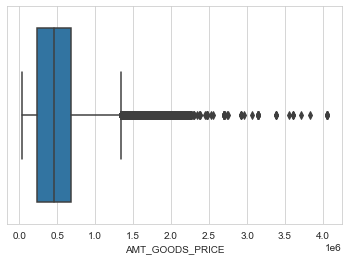

In [164]:
sns.boxplot(df1.AMT_GOODS_PRICE)

In [165]:
df1.EXT_SOURCE_2                   

0         0.262949
1         0.622246
2         0.555912
3         0.650442
4         0.322738
            ...   
307506    0.681632
307507    0.115992
307508    0.535722
307509    0.514163
307510    0.708569
Name: EXT_SOURCE_2, Length: 307511, dtype: float64

In [166]:
df1.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [167]:
df1.EXT_SOURCE_2.median()

0.5659614260608526

<AxesSubplot:xlabel='EXT_SOURCE_2'>

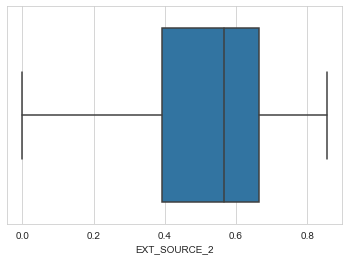

In [168]:
sns.boxplot(df1.EXT_SOURCE_2)

In [169]:
df1.EXT_SOURCE_2.fillna(0.57,inplace =True)
df1.EXT_SOURCE_2.isnull().sum()

0

In [170]:
df1.AMT_ANNUITY                     

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307506    27558.0
307507    12001.5
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 307511, dtype: float64

In [171]:
df1.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [172]:
df1.AMT_ANNUITY.median()

24903.0

<AxesSubplot:xlabel='AMT_ANNUITY'>

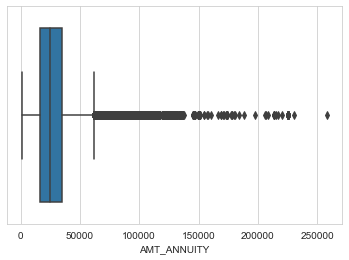

In [173]:
sns.boxplot(df1.AMT_ANNUITY)

In [174]:
df1.AMT_ANNUITY.fillna(24903.0,inplace =True)
df1.AMT_ANNUITY.isnull().sum()

0

In [175]:
df1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RAT

In [176]:
df1.CNT_FAM_MEMBERS               

0         1.0
1         2.0
2         1.0
3         2.0
4         1.0
         ... 
307506    1.0
307507    1.0
307508    1.0
307509    2.0
307510    2.0
Name: CNT_FAM_MEMBERS, Length: 307511, dtype: float64

<AxesSubplot:>

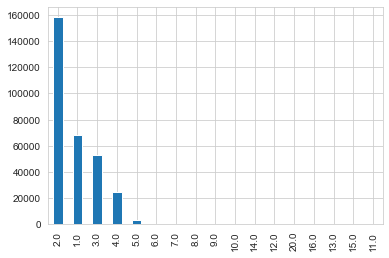

In [177]:
df1.CNT_FAM_MEMBERS.value_counts().plot.bar()

In [178]:
df1.CNT_FAM_MEMBERS.nunique()

17

In [179]:
df1.CNT_FAM_MEMBERS.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

In [180]:
df1.CNT_FAM_MEMBERS.dtypes

dtype('float64')

In [181]:
df1.CNT_FAM_MEMBERS.median()

2.0

In [182]:
# df1['CNT_FAM_MEMBERS']= df1['CNT_FAM_MEMBERS'].astype(int)
# df1.dtypes
df1.CNT_FAM_MEMBERS.fillna(2.0,inplace =True)
df1.CNT_FAM_MEMBERS.isnull().sum()

0

In [183]:
df1['CNT_FAM_MEMBERS']= df1['CNT_FAM_MEMBERS'].astype(int)
df1.CNT_FAM_MEMBERS.dtypes

dtype('int32')

In [184]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [185]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

# Converting Negative Values to Absolute Values

In [186]:
df1['DAYS_BIRTH'] = abs(df1['DAYS_BIRTH'])
df1['DAYS_ID_PUBLISH'] = abs(df1['DAYS_ID_PUBLISH'])
df1['DAYS_ID_PUBLISH'] = abs(df1['DAYS_ID_PUBLISH'])
df1['DAYS_LAST_PHONE_CHANGE'] = abs(df1['DAYS_LAST_PHONE_CHANGE'])
df1['DAYS_EMPLOYED']=  abs(df1['DAYS_EMPLOYED'])
df1['DAYS_REGISTRATION']=abs(df1['DAYS_REGISTRATION'])

In [187]:
df1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [188]:
df1.DAYS_LAST_PHONE_CHANGE         

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [189]:
df1.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [190]:
df1.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [191]:
df1.DAYS_LAST_PHONE_CHANGE.median()

757.0

In [192]:
df1.DAYS_LAST_PHONE_CHANGE.fillna(757.0,inplace=True )
df1.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [193]:
df1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [194]:
#Creating CLIENT_AGE and EMPLOYED_YEARS fields
df1['DAYS_BIRTH'] = df1['DAYS_BIRTH'].apply(lambda x: x//365)
df1['DAYS_EMPLOYED'] = df1['DAYS_EMPLOYED'].apply(lambda x: x//365)
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.487841     5.383163e+05   
std    4.024908e+05   14493.461065     3.692890e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868      43.435968     185.021521   
std                      0.013831      11.954593     381.972190   
min                      0.000290      20.000000       0.000000   
25%                      0.010006      34.000000       2.000000   
50%                      0.018850      43.000000       6.000000   
75%                      0.028663      53.000000      15.000000   
max                      0.072508      69.000000    1000.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean         4986.120328      2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min             0.000000         0.000000       0.000000        0.000000   
25%          2010.000000      1720.000000       1.000000        1.000000   
50%          4504.000000      3254.000000       1.000000        1.000000   
75%          7479.500000      4299.000000       1.000000        1.000000   
max         24672.000000      7197.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307511.000000         307511.000000                307511.000000   
mean          2.152664              2.052463                     2.031521   
std           0.910679              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [195]:
df1.DAYS_BIRTH.dtypes

dtype('int64')

In [267]:
df1.DAYS_BIRTH

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [ ]:
# df1['CLIENT_AGE_BAND'] = pd.cut(df1['CLIENT_AGE'],[0,17,25,35,45,55,np.inf])

# Analysis
Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


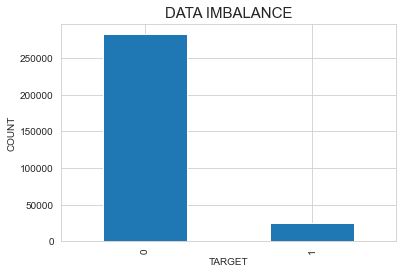

0    282686
1     24825
Name: TARGET, dtype: int64


In [196]:
Target_variable=df1.groupby('TARGET')['SK_ID_CURR'].count()
Target_variable.plot.bar()

plt.xlabel('TARGET')
plt.ylabel('COUNT')
plt.title('DATA IMBALANCE',fontsize=15)
plt.show()
print(df1.TARGET.value_counts())

### Imbalance Percentage


In [197]:
round(df1.TARGET.value_counts(normalize= True)*100)

0    92.0
1     8.0
Name: TARGET, dtype: float64

# That means 8% of the people had payment difficulties and hence delayed payments while 92% pertain to all other cases.

In [198]:
#Dividing dataframe into two with respect to TARGET
df1_0 = df1[df1['TARGET'] == 0]
df1_1 = df1[df1['TARGET'] == 1]

In [199]:
print(df1_0.shape)
print(df1_1.shape)

(282686, 73)
(24825, 73)


In [200]:
# for i in cont_cols:
#     sns.histplot(df[i])
#     plt.xlabel(i)
#     plt.title("Frequency Distribution of "+i)
#     plt.xticks(rotation=45)
#     plt.show()

# print(list(Obj_dtypes_1))
# print(list(Num_dtypes_1))
# for i in Num_dtypes_1:
#     sns.boxplot(df1_0[i])
#     plt.xlabel(i)
#     plt.title("Frequency Distribution of "+i)
#     plt.xticks(rotation=45)
#     plt.show()
    



## Merge both the data frames(application data frame and Previous application data frame)

In [201]:
merged_df = pd.merge(df1, df2, how='inner', on='SK_ID_CURR')
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25              1             3648.0   
1                    0.003541          45              3             1186.0   
2                    0.003541          45              3             1186.0   
3                    0.003541          45              3             1186.0   
4                    0.010032          52              0             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0      Core staff                2   
3                 1           1           0      Core staff                2   
4                 1           1           0        Laborers                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

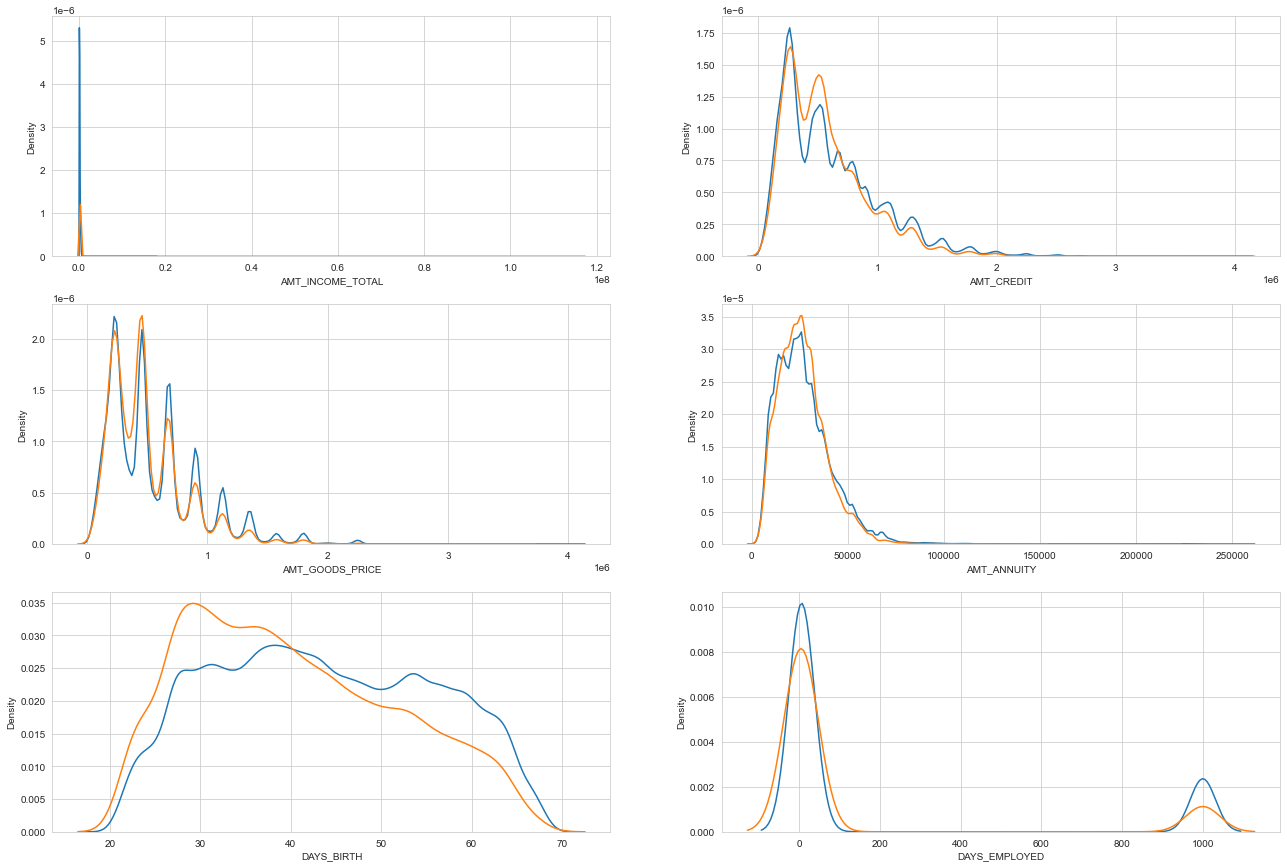

In [202]:
plt.figure(1,figsize=(22,15))

plt.subplot(3,2,1)
sns.distplot(df1_0['AMT_INCOME_TOTAL'],hist=False)
sns.distplot(df1_1['AMT_INCOME_TOTAL'],hist=False)

plt.subplot(3,2,2)
sns.distplot(df1_0['AMT_CREDIT'],hist=False)
sns.distplot(df1_1['AMT_CREDIT'],hist=False)

plt.subplot(3,2,3)
sns.distplot(df1_0['AMT_GOODS_PRICE'],hist=False)
sns.distplot(df1_1['AMT_GOODS_PRICE'],hist=False)

plt.subplot(3,2,4)
sns.distplot(df1_0['AMT_ANNUITY'],hist=False)
sns.distplot(df1_1['AMT_ANNUITY'],hist=False)

plt.subplot(3,2,5)
sns.distplot(df1_0['DAYS_BIRTH'],hist=False)
sns.distplot(df1_1['DAYS_BIRTH'],hist=False)

plt.subplot(3,2,6)
sns.distplot(df1_0['DAYS_EMPLOYED'],hist=False)
sns.distplot(df1_1['DAYS_EMPLOYED'],hist=False)

plt.show()

There is no significant difference in trends for both cases for any of the variables, except for CLIENT_AGE where it is more densely populated in the range 20 to 40 years after which there is a downward trend when TARGET = 1, that is the client is having difficulty to make payments while it is more or less uniformly distributed between ages 20 and 70 when TARGET = 0.

In [203]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

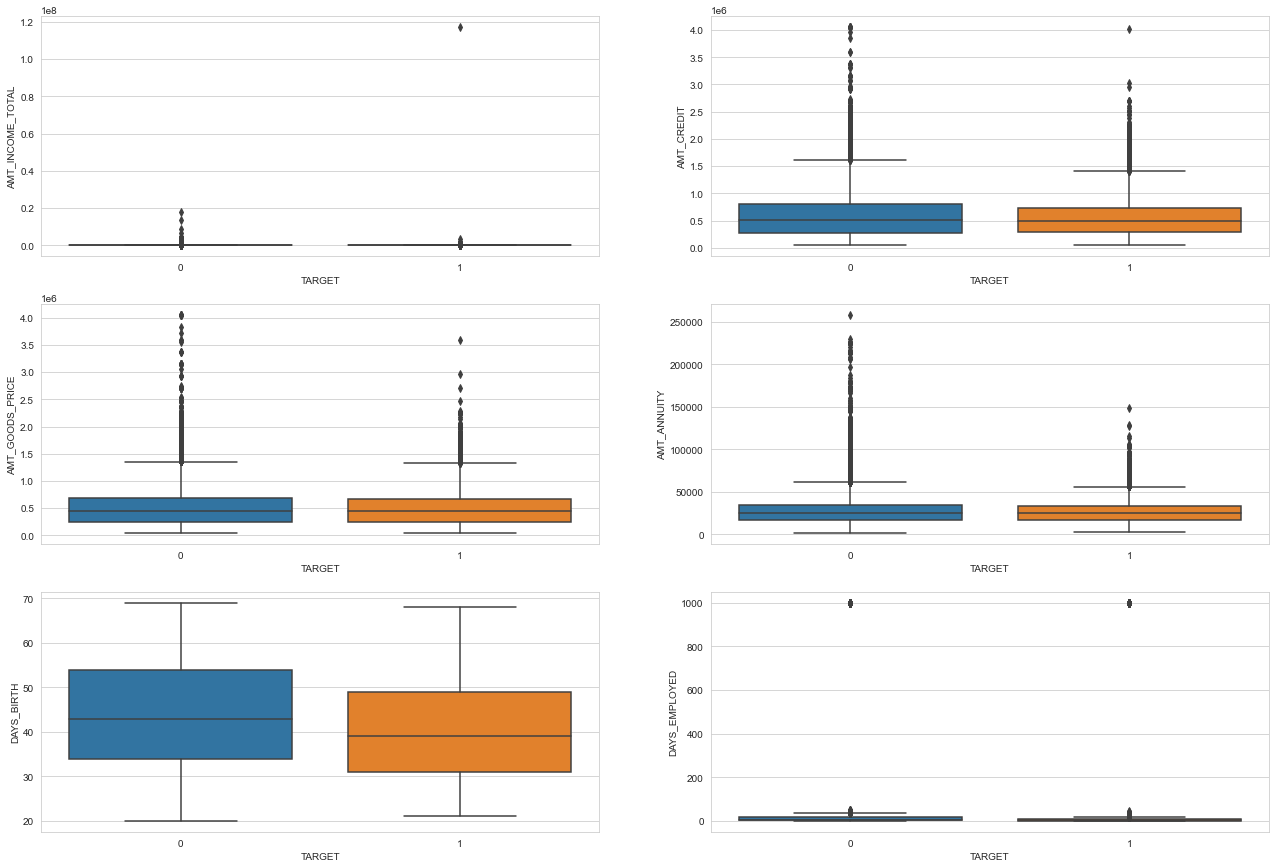

In [204]:

#Univariate analysis on continous variables
plt.figure(1,figsize=(22,15))

plt.subplot(3,2,1)
sns.boxplot(data=df1,x="TARGET",y="AMT_INCOME_TOTAL")

plt.subplot(3,2,2)
sns.boxplot(data=df1,x="TARGET",y="AMT_CREDIT")

plt.subplot(3,2,3)
sns.boxplot(data=df1,x="TARGET",y="AMT_GOODS_PRICE")

plt.subplot(3,2,4)
sns.boxplot(data=df1,x="TARGET",y="AMT_ANNUITY")

plt.subplot(3,2,5)
sns.boxplot(data=df1,x="TARGET",y="DAYS_BIRTH")

plt.subplot(3,2,6)
sns.boxplot(data=df1,x="TARGET",y="DAYS_EMPLOYED")

plt.show()

In [205]:
df1.groupby('TARGET')['DAYS_BIRTH'].quantile([0.25,0.5,0.75,0.9,0.95,0.99,1])

TARGET      
0       0.25    34.0
        0.50    43.0
        0.75    54.0
        0.90    60.0
        0.95    63.0
        0.99    66.0
        1.00    69.0
1       0.25    31.0
        0.50    39.0
        0.75    49.0
        0.90    57.0
        0.95    61.0
        0.99    65.0
        1.00    68.0
Name: DAYS_BIRTH, dtype: float64

<AxesSubplot:xlabel='TARGET,None'>

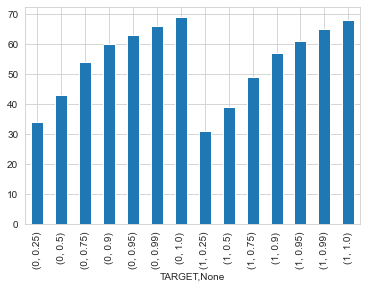

In [268]:
df1.groupby('TARGET')['DAYS_BIRTH'].quantile([0.25,0.5,0.75,0.9,0.95,0.99,1]).plot.bar()

This infers that people of lower ages were actually the ones having payment difficulties, that is, they lie in the dataset where TARGET = 1.
75th percentile is 54 when TARGET = 0 while 49 when TARGET = 1.

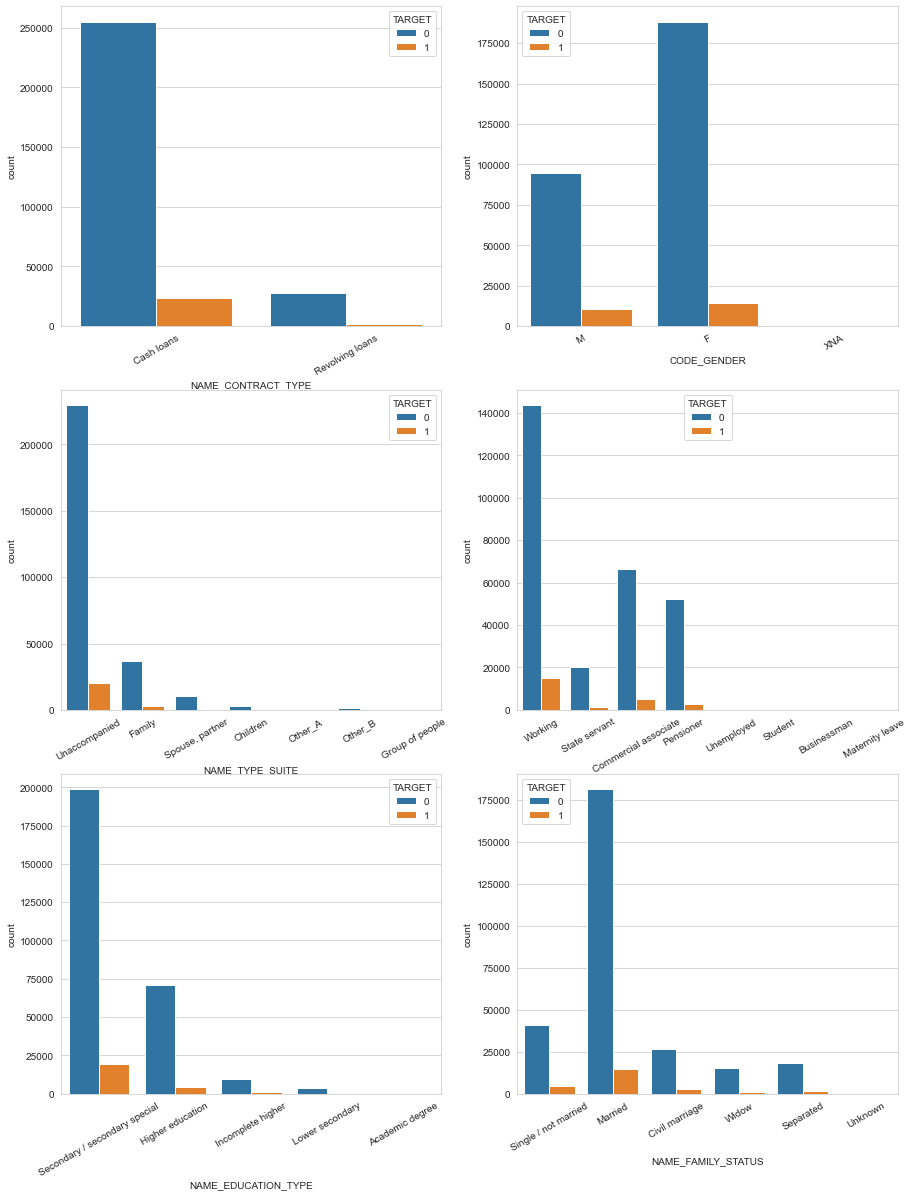

In [206]:
#Univariate analysis on categorical variables
plt.figure(figsize = (15,20))

plt.subplot(3,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'TARGET', data = df1)
plt.xticks(rotation = 30)

plt.subplot(3,2,2)
sns.countplot(x = 'CODE_GENDER', hue = 'TARGET', data = df1)
plt.xticks(rotation = 30)

plt.subplot(3,2,3)
sns.countplot(x = 'NAME_TYPE_SUITE', hue = 'TARGET', data = df1)
plt.xticks(rotation = 30)

plt.subplot(3,2,4)
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'TARGET', data = df1)
plt.xticks(rotation = 30)

plt.subplot(3,2,5)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'TARGET', data = df1)
plt.xticks(rotation = 30)

plt.subplot(3,2,6)
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'TARGET', data = df1)
plt.xticks(rotation = 30)

plt.show()


The points infer from the graph for both possible values of TARGET. The ditribution is as follows:
1. Majority of clients who have opted for Cash Loans as compared to Revolving Loans
2. Higher proportion of females have taken a loan as compared to males.
3. Majority of clients have an unaccompanied type of suite.
4. Working clients are of a significantly higher proportion followed by Commercial Associate, Pensioner and State Servant
5. Most clients have obtained secondary education.
6. Majority of clients are married followed by single, civil maried, separated and widow.

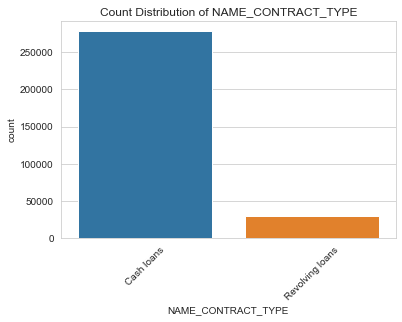

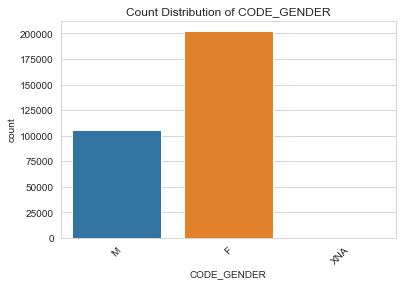

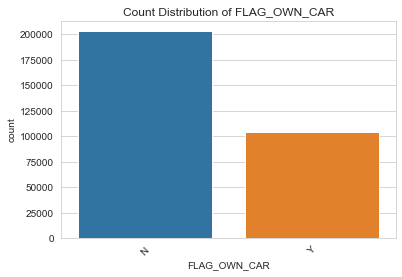

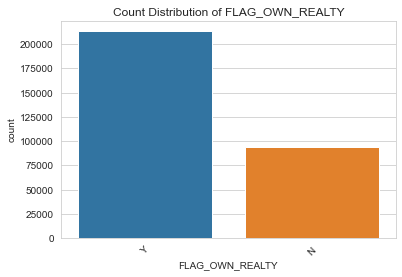

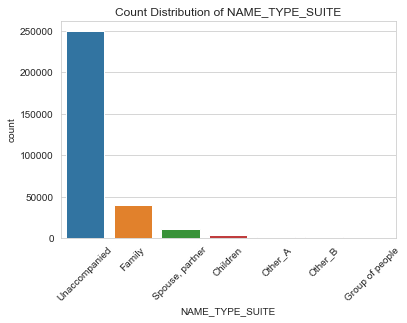

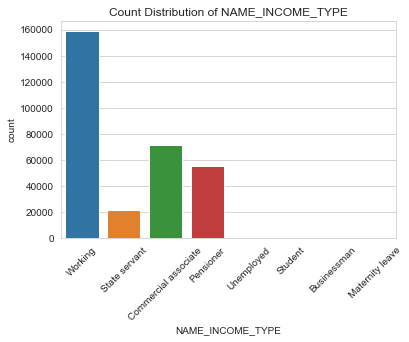

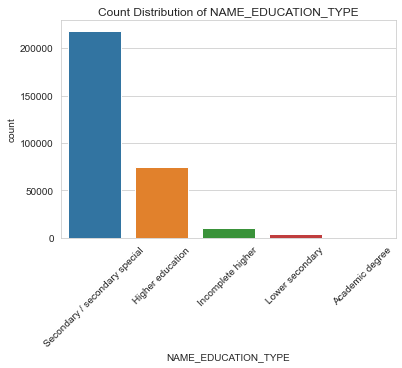

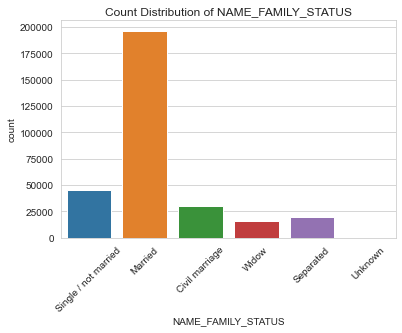

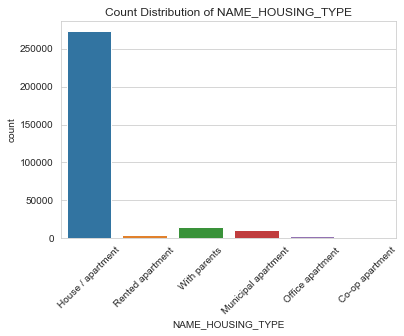

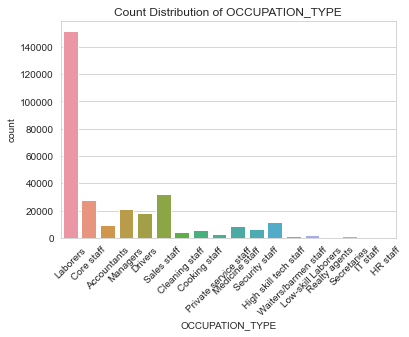

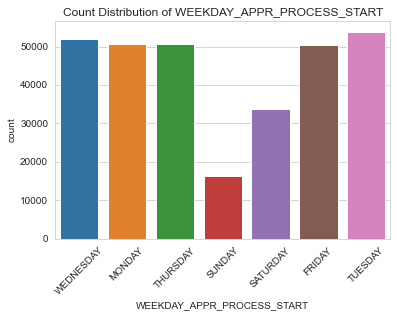

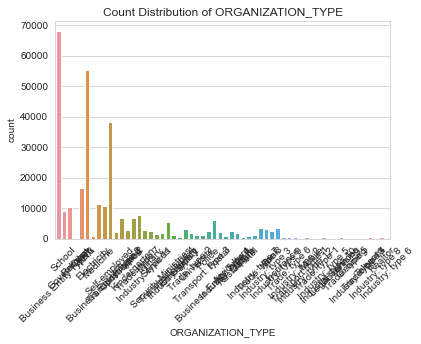

In [207]:
# Univariate analysis for categorical column
for i in Obj_dtypes_1:
    sns.countplot(df1[i])
    plt.xlabel(i)
    plt.title("Count Distribution of "+i)
    plt.xticks(rotation=45)
    plt.show()

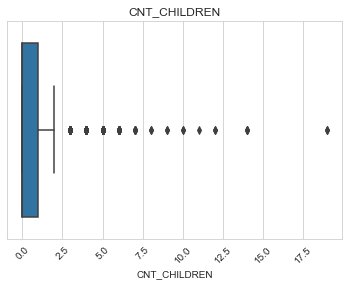

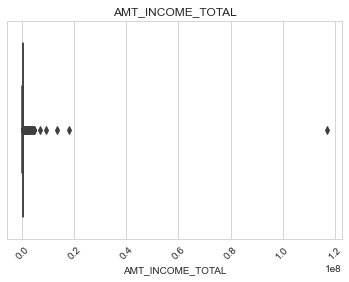

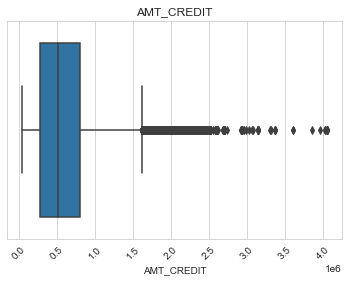

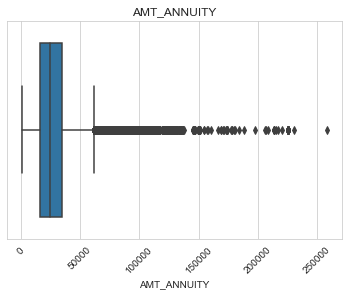

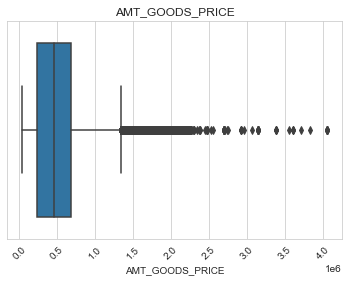

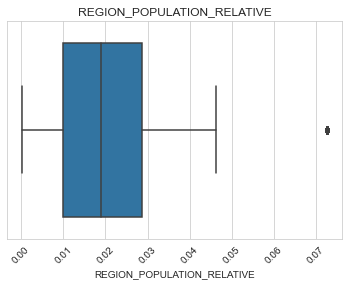

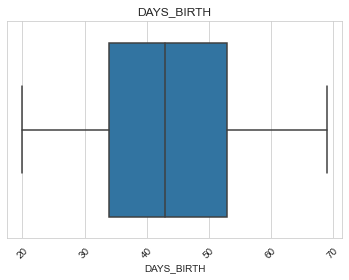

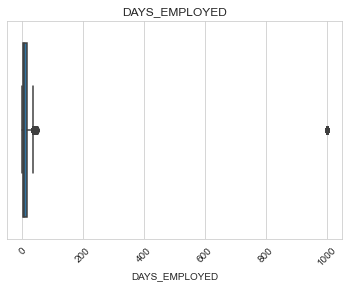

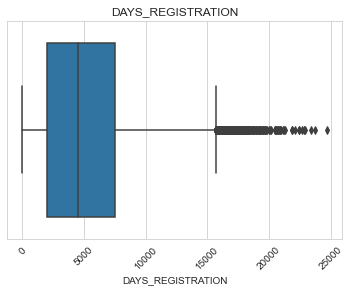

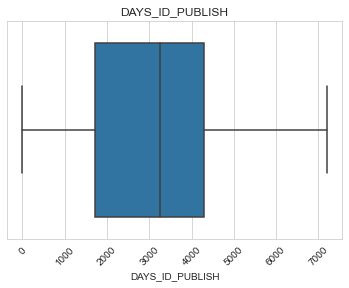

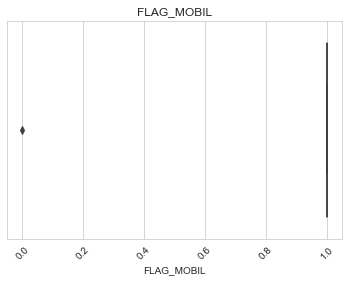

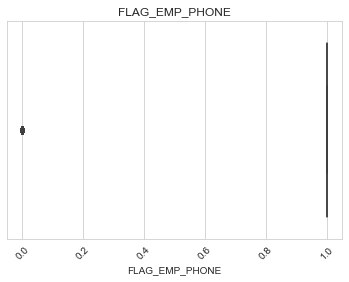

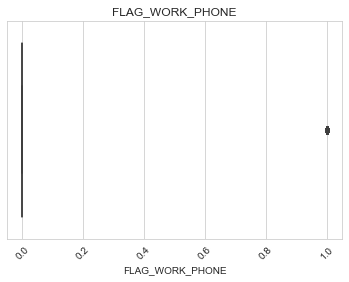

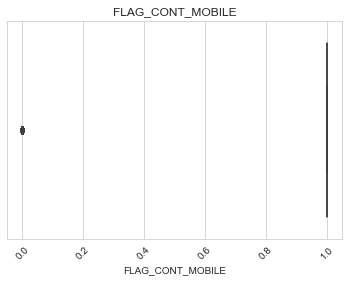

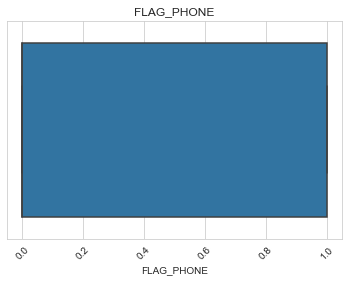

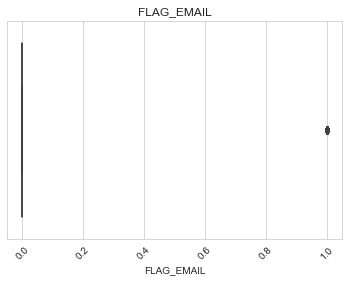

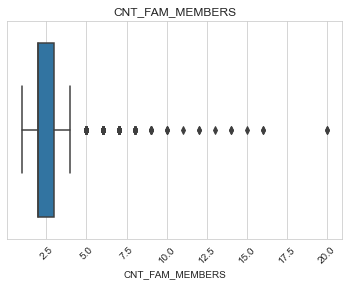

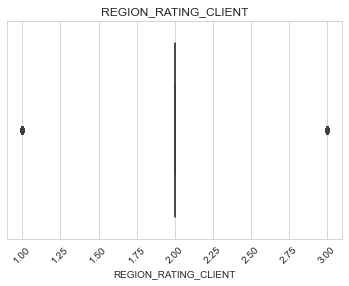

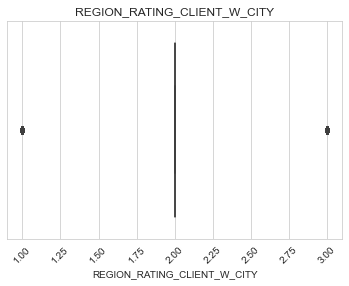

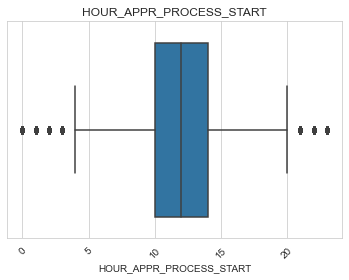

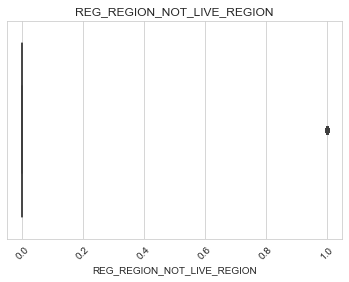

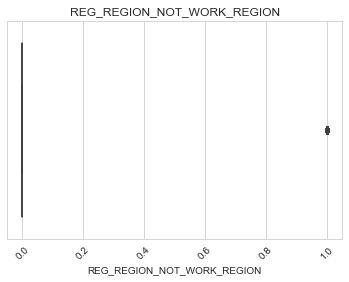

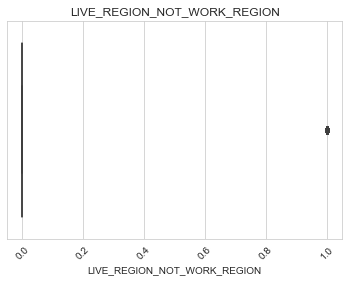

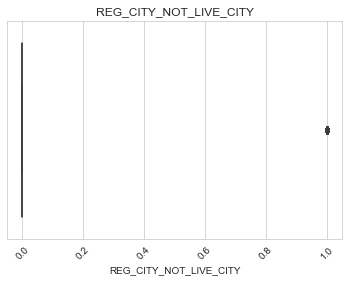

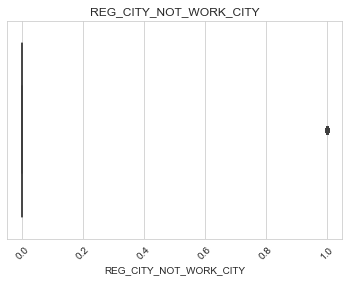

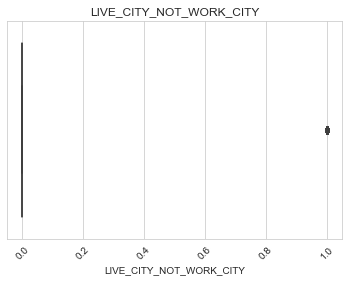

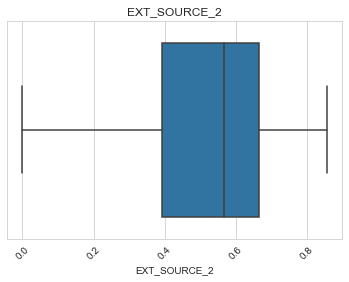

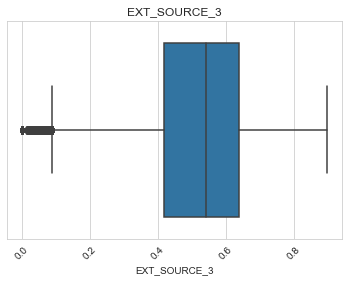

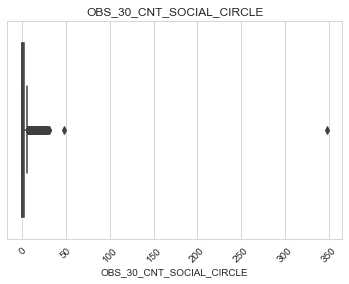

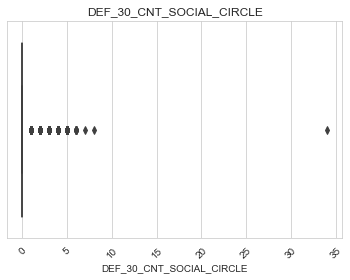

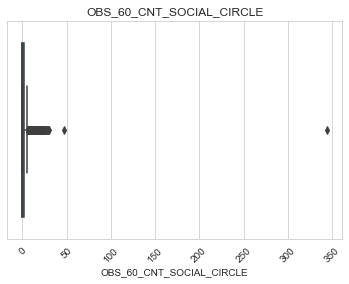

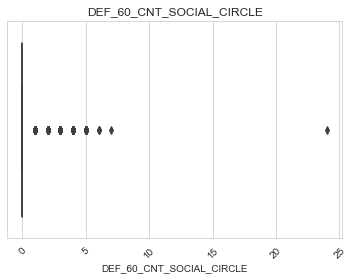

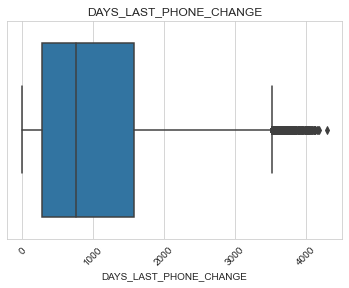

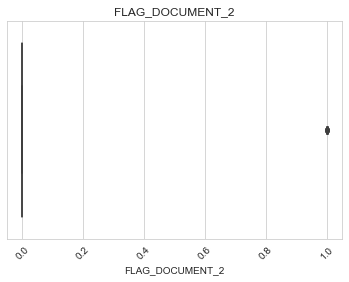

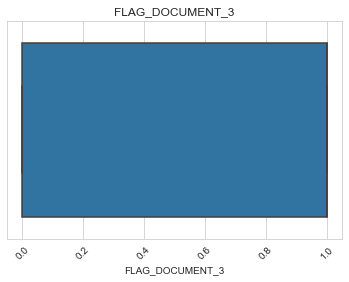

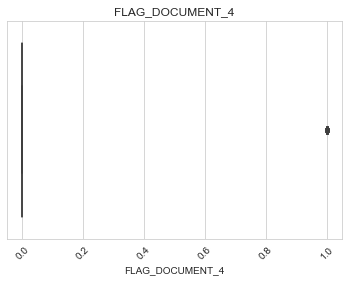

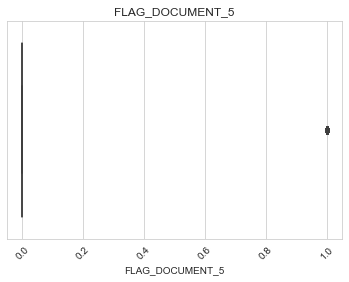

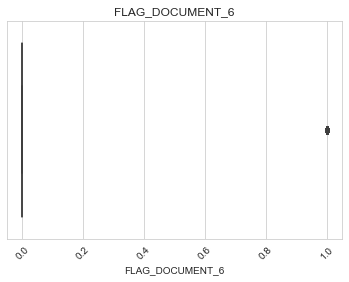

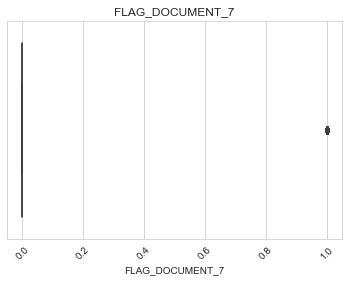

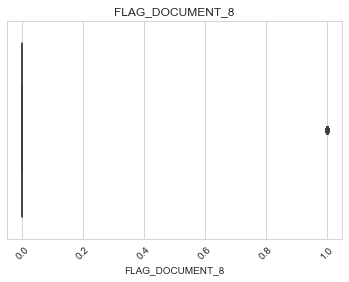

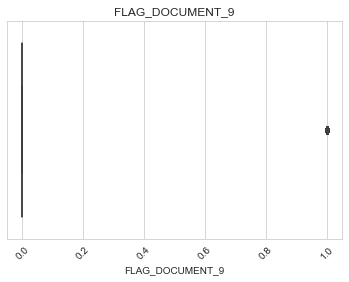

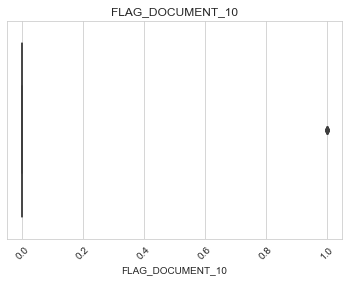

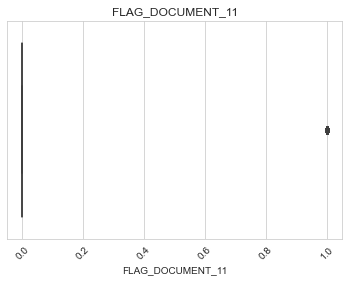

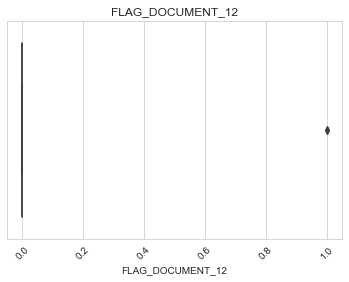

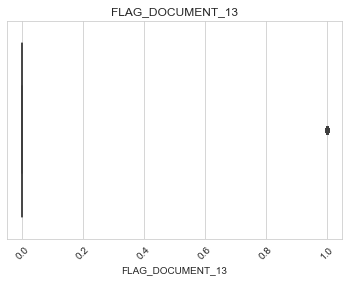

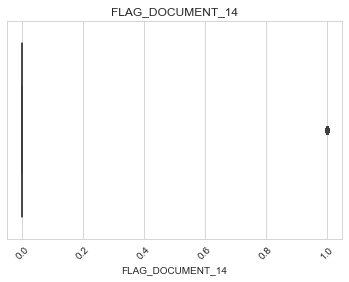

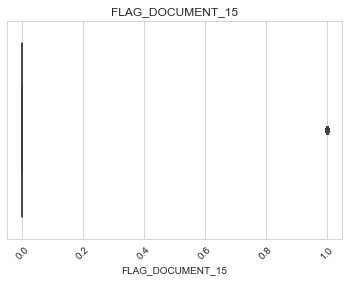

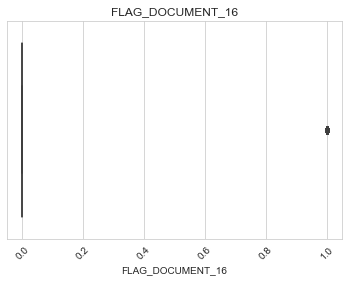

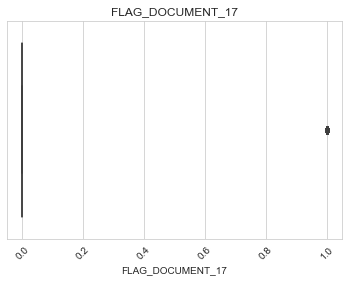

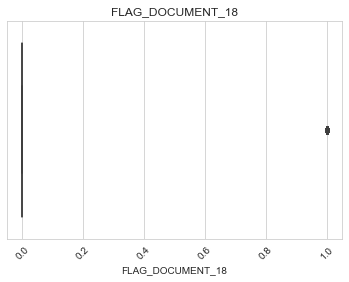

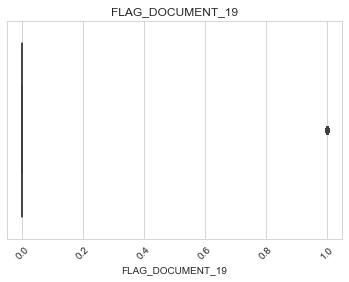

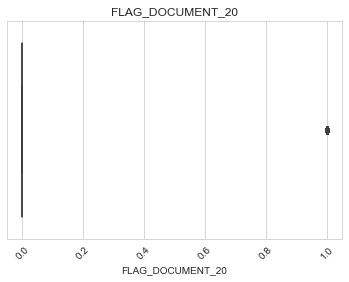

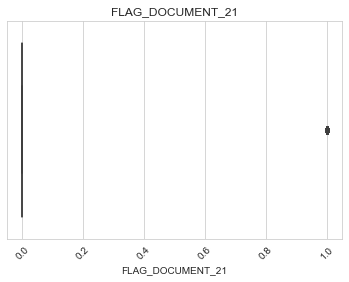

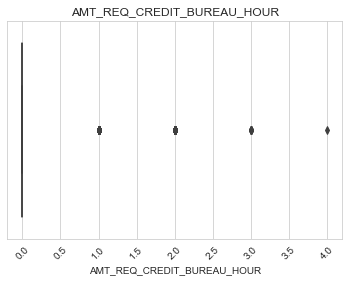

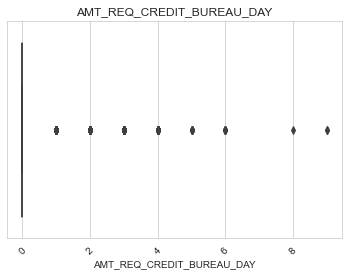

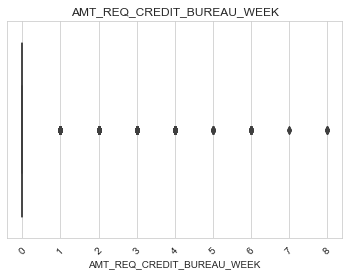

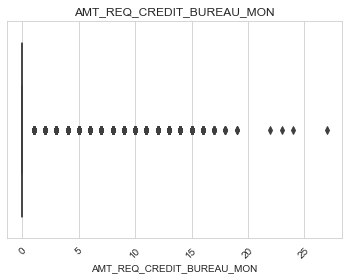

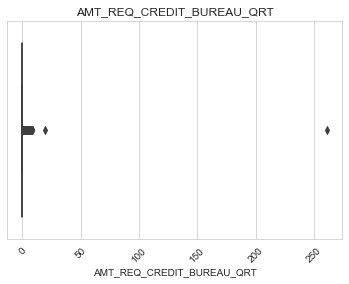

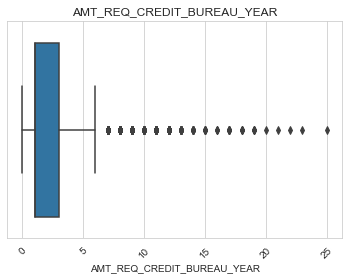

In [208]:
# Univariate analysis for numerical column
for i in Num_dtypes_1:
    sns.boxplot(df1[i])
    plt.xlabel(i)
    plt.title(i)
    plt.xticks(rotation=45)
    plt.show()

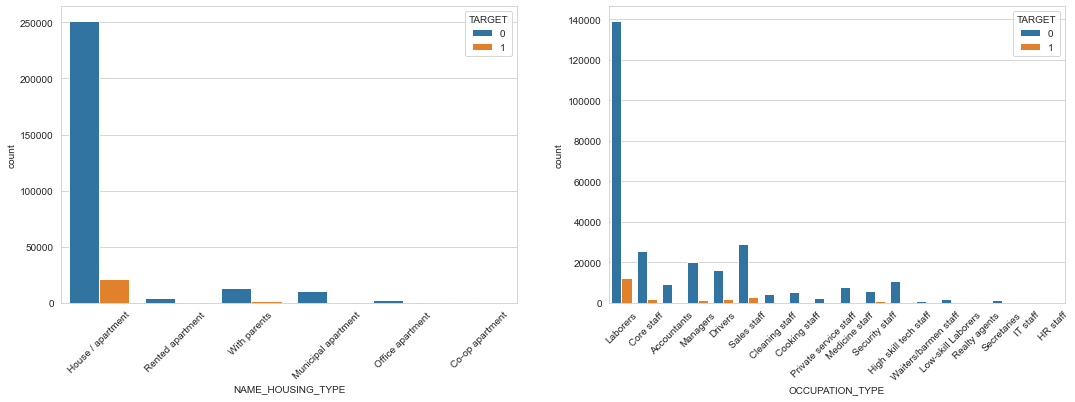

In [209]:
plt.figure(figsize = (18,12))

plt.subplot(2,2,1)
sns.countplot(x = 'NAME_HOUSING_TYPE', hue = 'TARGET', data = df1)
plt.xticks(rotation = 45)

plt.subplot(2,2,2)
sns.countplot(x = 'OCCUPATION_TYPE', hue = 'TARGET', data = df1)
plt.xticks(rotation = 45)

plt.show()



inferenceses from above:
1. majority of clients own a house/apartment in both cases  but proportion being larger when TARGET = 0
2. Majority of clients are Labourers in both cases. Drivers are of higher proportion as compared to managers when TARGET = 1 unlike when TARGET = 0. Also cooking staff, security staff and high skill tech staff have almost equal proportion when TARGET = 1

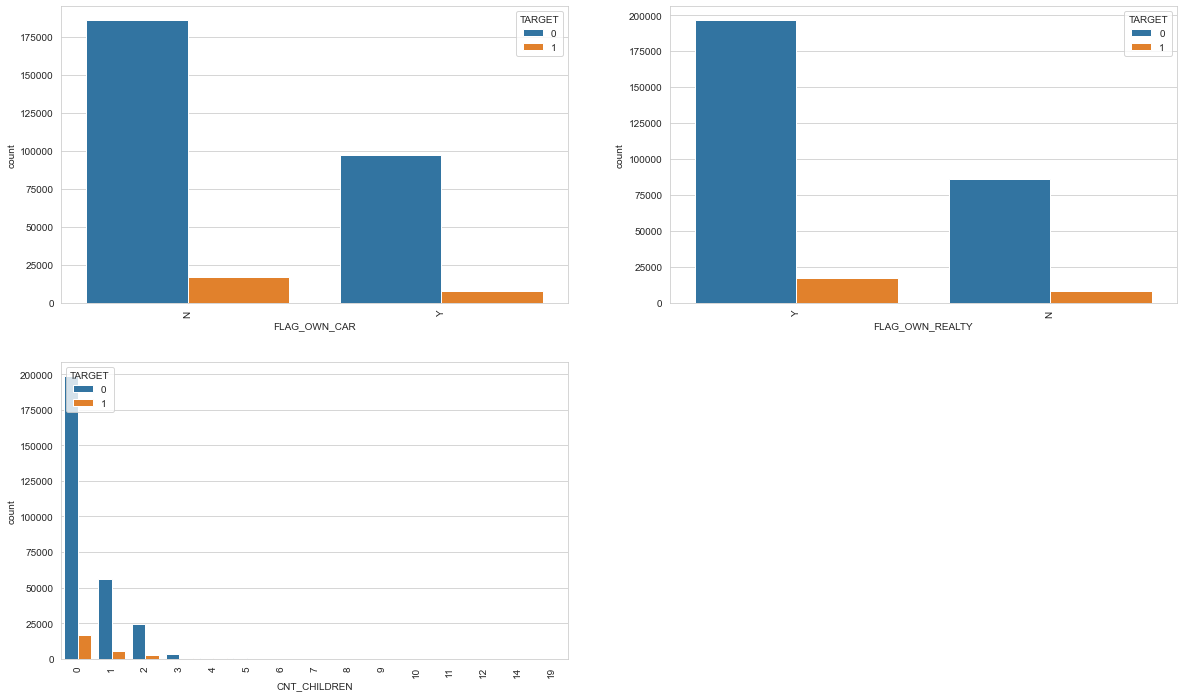

In [210]:
plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', hue = 'TARGET', data = df1)
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'TARGET', data = df1)
plt.xticks(rotation = 90)

# loan['CNT_CHILDREN_GROUPED'] = pd.cut(loan['CNT_CHILDREN'],[-np.inf,0,1,2,3,np.inf])
plt.subplot(2,2,3)
sns.countplot(x = 'CNT_CHILDREN', hue = 'TARGET', data = df1)
plt.xticks(rotation = 90)



plt.show()

<AxesSubplot:>

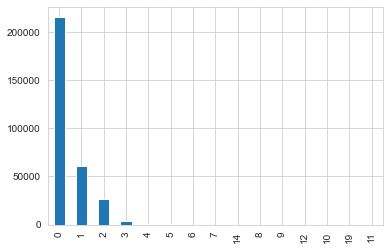

In [211]:
df1.CNT_CHILDREN.value_counts().plot.bar()

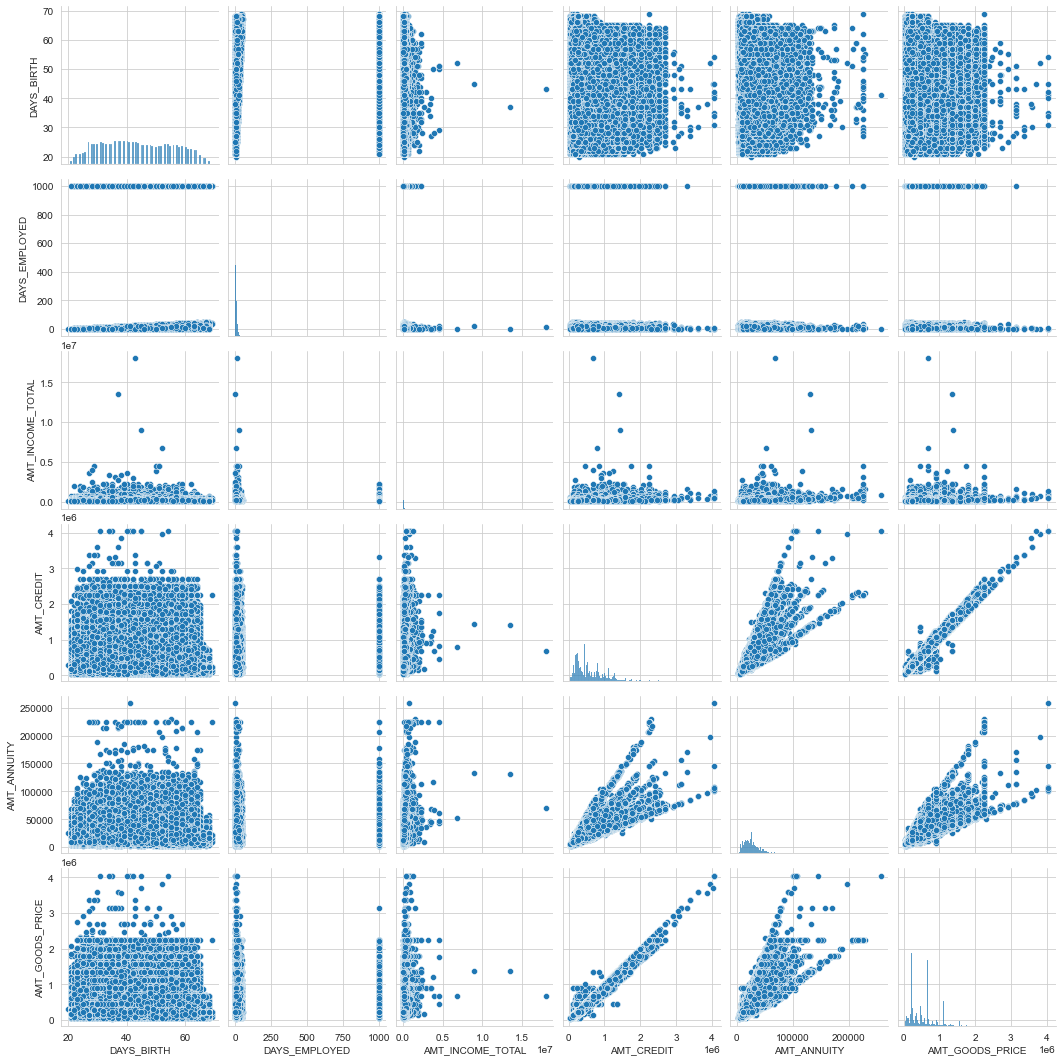

In [212]:


#Bivariate analysis when TARGET = 0
sns.pairplot(data=df1_0,vars=['DAYS_BIRTH','DAYS_EMPLOYED','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])
plt.show()

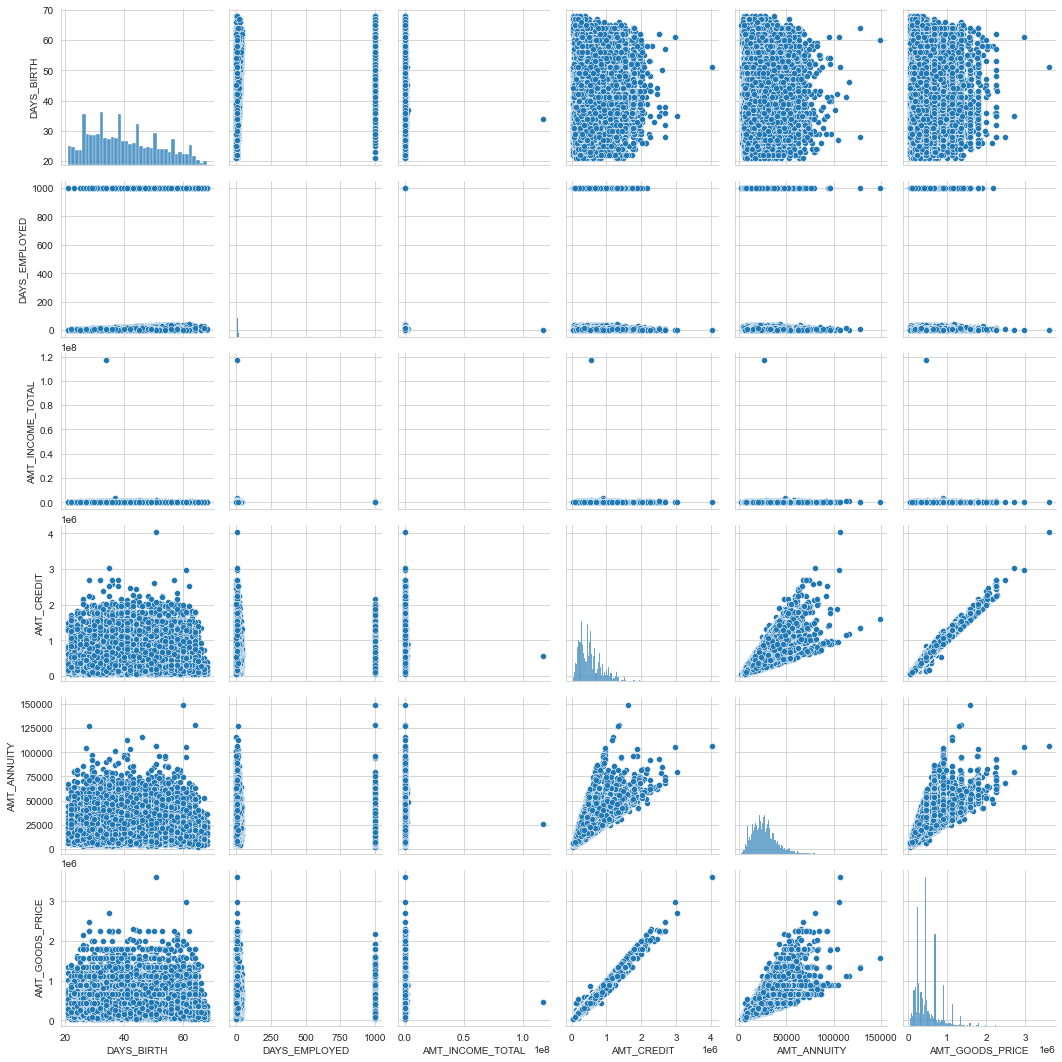

In [213]:
#Bivariate analysis when Target =1
sns.pairplot(data=df1_1,vars=['DAYS_BIRTH','DAYS_EMPLOYED','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])
plt.show()

In [214]:
corr=df1_0.corr()
corr

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000     NaN     -0.000716   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                  -0.000716     NaN      1.000000   
AMT_INCOME_TOTAL               0.001739     NaN      0.027397   
AMT_CREDIT                    -0.000342     NaN      0.003081   
AMT_ANNUITY                    0.000071     NaN      0.020909   
AMT_GOODS_PRICE               -0.000235     NaN     -0.000559   
REGION_POPULATION_RELATIVE     0.000360     NaN     -0.024363   
DAYS_BIRTH                     0.001318     NaN     -0.336907   
DAYS_EMPLOYED                  0.001742     NaN     -0.245173   
DAYS_REGISTRATION              0.001475     NaN     -0.185792   
DAYS_ID_PUBLISH                0.000077     NaN      0.028751   
FLAG_MOBIL                     0.002925     NaN      0.001080   
FLAG_EMP_PHONE                -0.001717     NaN      0.244274   
FLAG_WORK_PHONE               -0.000854     NaN      0.055453   
FLAG_CONT_MOBILE               0.003319     NaN     -0.001201   
FLAG_PHONE                     0.001408     NaN     -0.029929   
FLAG_EMAIL                     0.000229     NaN      0.023460   
CNT_FAM_MEMBERS               -0.002789     NaN      0.878571   
REGION_RATING_CLIENT          -0.000519     NaN      0.022842   
REGION_RATING_CLIENT_W_CITY   -0.000739     NaN      0.021866   
HOUR_APPR_PROCESS_START       -0.000115     NaN     -0.005244   
REG_REGION_NOT_LIVE_REGION     0.000104     NaN     -0.012342   
REG_REGION_NOT_WORK_REGION     0.000836     NaN      0.010857   
LIVE_REGION_NOT_WORK_REGION    0.002784     NaN      0.017326   
REG_CITY_NOT_LIVE_CITY        -0.002885     NaN      0.021587   
REG_CITY_NOT_WORK_CITY        -0.001696     NaN      0.072193   
LIVE_CITY_NOT_WORK_CITY        0.000428     NaN      0.070988   
EXT_SOURCE_2                   0.001569     NaN     -0.015438   
EXT_SOURCE_3                   0.000233     NaN     -0.038511   
OBS_30_CNT_SOCIAL_CIRCLE      -0.000697     NaN      0.014532   
DEF_30_CNT_SOCIAL_CIRCLE       0.000553     NaN     -0.002193   
OBS_60_CNT_SOCIAL_CIRCLE      -0.000743     NaN      0.014199   
DEF_60_CNT_SOCIAL_CIRCLE       0.002375     NaN     -0.002125   
DAYS_LAST_PHONE_CHANGE         0.000999     NaN      0.008501   
FLAG_DOCUMENT_2                0.001342     NaN      0.003736   
FLAG_DOCUMENT_3               -0.003217     NaN      0.055718   
FLAG_DOCUMENT_4               -0.004321     NaN     -0.003833   
FLAG_DOCUMENT_5               -0.001426     NaN     -0.016239   
FLAG_DOCUMENT_6                0.001972     NaN     -0.158963   
FLAG_DOCUMENT_7               -0.003047     NaN     -0.001442   
FLAG_DOCUMENT_8                0.001618     NaN      0.053919   
FLAG_DOCUMENT_9                0.002007     NaN     -0.002358   
FLAG_DOCUMENT_10              -0.000852     NaN     -0.002859   
FLAG_DOCUMENT_11              -0.001900     NaN     -0.005059   
FLAG_DOCUMENT_12              -0.001092     NaN      0.000322   
FLAG_DOCUMENT_13               0.001006     NaN      0.004340   
FLAG_DOCUMENT_14              -0.001236     NaN     -0.005455   
FLAG_DOCUMENT_15               0.002330     NaN      0.003710   
FLAG_DOCUMENT_16              -0.000753     NaN      0.011775   
FLAG_DOCUMENT_17               0.001776     NaN      0.001160   
FLAG_DOCUMENT_18               0.001194     NaN      0.004181   
FLAG_DOCUMENT_19               0.000676     NaN      0.001078   
FLAG_DOCUMENT_20               0.000832     NaN      0.001302   
FLAG_DOCUMENT_21              -0.000485     NaN     -0.002983   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.001774     NaN      0.000147   
AMT_REQ_CREDIT_BUREAU_DAY     -0.001626     NaN      0.001057   
AMT_REQ_CREDIT_BUREAU_WEEK     0.002298     NaN     -0.000315   
AMT_REQ_CREDIT_BUREAU_MON     -0.000037     NaN     -0.007640   
AMT_REQ_CREDIT_BUREAU_QRT      0.000963     NaN     -0.004218   
AMT_REQ_CREDIT_BUREAU_YEAR     0.003852     NaN     -0.035861   

To get rid of the repeated correlation values between two variables we perform the following steps

In [215]:
#Convert the diagonal and below diagonal values of matrix to False, Whereever False is there is replaced with NaN on execution
corr=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr


SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                          NaN     NaN     -0.000716   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                        NaN     NaN           NaN   
AMT_INCOME_TOTAL                    NaN     NaN           NaN   
AMT_CREDIT                          NaN     NaN           NaN   
AMT_ANNUITY                         NaN     NaN           NaN   
AMT_GOODS_PRICE                     NaN     NaN           NaN   
REGION_POPULATION_RELATIVE          NaN     NaN           NaN   
DAYS_BIRTH                          NaN     NaN           NaN   
DAYS_EMPLOYED                       NaN     NaN           NaN   
DAYS_REGISTRATION                   NaN     NaN           NaN   
DAYS_ID_PUBLISH                     NaN     NaN           NaN   
FLAG_MOBIL                          NaN     NaN           NaN   
FLAG_EMP_PHONE                      NaN     NaN           NaN   
FLAG_WORK_PHONE                     NaN     NaN           NaN   
FLAG_CONT_MOBILE                    NaN     NaN           NaN   
FLAG_PHONE                          NaN     NaN           NaN   
FLAG_EMAIL                          NaN     NaN           NaN   
CNT_FAM_MEMBERS                     NaN     NaN           NaN   
REGION_RATING_CLIENT                NaN     NaN           NaN   
REGION_RATING_CLIENT_W_CITY         NaN     NaN           NaN   
HOUR_APPR_PROCESS_START             NaN     NaN           NaN   
REG_REGION_NOT_LIVE_REGION          NaN     NaN           NaN   
REG_REGION_NOT_WORK_REGION          NaN     NaN           NaN   
LIVE_REGION_NOT_WORK_REGION         NaN     NaN           NaN   
REG_CITY_NOT_LIVE_CITY              NaN     NaN           NaN   
REG_CITY_NOT_WORK_CITY              NaN     NaN           NaN   
LIVE_CITY_NOT_WORK_CITY             NaN     NaN           NaN   
EXT_SOURCE_2                        NaN     NaN           NaN   
EXT_SOURCE_3                        NaN     NaN           NaN   
OBS_30_CNT_SOCIAL_CIRCLE            NaN     NaN           NaN   
DEF_30_CNT_SOCIAL_CIRCLE            NaN     NaN           NaN   
OBS_60_CNT_SOCIAL_CIRCLE            NaN     NaN           NaN   
DEF_60_CNT_SOCIAL_CIRCLE            NaN     NaN           NaN   
DAYS_LAST_PHONE_CHANGE              NaN     NaN           NaN   
FLAG_DOCUMENT_2                     NaN     NaN           NaN   
FLAG_DOCUMENT_3                     NaN     NaN           NaN   
FLAG_DOCUMENT_4                     NaN     NaN           NaN   
FLAG_DOCUMENT_5                     NaN     NaN           NaN   
FLAG_DOCUMENT_6                     NaN     NaN           NaN   
FLAG_DOCUMENT_7                     NaN     NaN           NaN   
FLAG_DOCUMENT_8                     NaN     NaN           NaN   
FLAG_DOCUMENT_9                     NaN     NaN           NaN   
FLAG_DOCUMENT_10                    NaN     NaN           NaN   
FLAG_DOCUMENT_11                    NaN     NaN           NaN   
FLAG_DOCUMENT_12                    NaN     NaN           NaN   
FLAG_DOCUMENT_13                    NaN     NaN           NaN   
FLAG_DOCUMENT_14                    NaN     NaN           NaN   
FLAG_DOCUMENT_15                    NaN     NaN           NaN   
FLAG_DOCUMENT_16                    NaN     NaN           NaN   
FLAG_DOCUMENT_17                    NaN     NaN           NaN   
FLAG_DOCUMENT_18                    NaN     NaN           NaN   
FLAG_DOCUMENT_19                    NaN     NaN           NaN   
FLAG_DOCUMENT_20                    NaN     NaN           NaN   
FLAG_DOCUMENT_21                    NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_HOUR          NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_DAY           NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_WEEK          NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_MON           NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_QRT           NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_YEAR          NaN     NaN           NaN   

In [216]:
#convert it to dataframe
corr_df = corr.unstack().reset_index()
corr_df.head()

level_0           level_1   0
0  SK_ID_CURR        SK_ID_CURR NaN
1  SK_ID_CURR            TARGET NaN
2  SK_ID_CURR      CNT_CHILDREN NaN
3  SK_ID_CURR  AMT_INCOME_TOTAL NaN
4  SK_ID_CURR        AMT_CREDIT NaN

In [217]:
#Changing the names of columns
corr_df.columns=['VAR_1','VAR_2','Correlation']
corr_df.head()

VAR_1             VAR_2  Correlation
0  SK_ID_CURR        SK_ID_CURR          NaN
1  SK_ID_CURR            TARGET          NaN
2  SK_ID_CURR      CNT_CHILDREN          NaN
3  SK_ID_CURR  AMT_INCOME_TOTAL          NaN
4  SK_ID_CURR        AMT_CREDIT          NaN

In [218]:
#Drop the columns having the missing data
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df.head()

VAR_1         VAR_2  Correlation
122      CNT_CHILDREN    SK_ID_CURR    -0.000716
183  AMT_INCOME_TOTAL    SK_ID_CURR     0.001739
185  AMT_INCOME_TOTAL  CNT_CHILDREN     0.027397
244        AMT_CREDIT    SK_ID_CURR    -0.000342
246        AMT_CREDIT  CNT_CHILDREN     0.003081

In [219]:
#Rounding off the values
corr_df['Correlation'] = round(corr_df['Correlation'], 2)
corr_df.head()

VAR_1         VAR_2  Correlation
122      CNT_CHILDREN    SK_ID_CURR        -0.00
183  AMT_INCOME_TOTAL    SK_ID_CURR         0.00
185  AMT_INCOME_TOTAL  CNT_CHILDREN         0.03
244        AMT_CREDIT    SK_ID_CURR        -0.00
246        AMT_CREDIT  CNT_CHILDREN         0.00

In [220]:
# Since we see correlation as an absolute value, we are converting it into absolute value
corr_df['Correlation'] = corr_df['Correlation'].abs()
corr_df.head()

VAR_1         VAR_2  Correlation
122      CNT_CHILDREN    SK_ID_CURR         0.00
183  AMT_INCOME_TOTAL    SK_ID_CURR         0.00
185  AMT_INCOME_TOTAL  CNT_CHILDREN         0.03
244        AMT_CREDIT    SK_ID_CURR         0.00
246        AMT_CREDIT  CNT_CHILDREN         0.00

In [221]:
#Sorting the correlation values
corr_df.sort_values(by = 'Correlation', ascending = False).head(10)

VAR_1                       VAR_2  Correlation
1982     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
802                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
370               AMT_GOODS_PRICE                  AMT_CREDIT         0.99
1239  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95
1100              CNT_FAM_MEMBERS                CNT_CHILDREN         0.88
1487  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.86
2044     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.86
1673      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83
371               AMT_GOODS_PRICE                 AMT_ANNUITY         0.78
309                   AMT_ANNUITY                  AMT_CREDIT         0.77

We can see that for df1_0 dataframe, Social circle for 30 days and 60 days are most correlated and Goods price and Loan amount credit are highly correlated.Then we have Goods price and amount annuity on 4th place

In [222]:
corr = df1_1.corr()
corr

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000     NaN     -0.005144   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                  -0.005144     NaN      1.000000   
AMT_INCOME_TOTAL              -0.010165     NaN      0.004796   
AMT_CREDIT                    -0.001290     NaN     -0.001675   
AMT_ANNUITY                   -0.007578     NaN      0.031257   
AMT_GOODS_PRICE               -0.001814     NaN     -0.008111   
REGION_POPULATION_RELATIVE     0.006301     NaN     -0.031975   
DAYS_BIRTH                     0.001160     NaN     -0.259222   
DAYS_EMPLOYED                 -0.005166     NaN     -0.192866   
DAYS_REGISTRATION             -0.006342     NaN     -0.149154   
DAYS_ID_PUBLISH                0.002539     NaN      0.032299   
FLAG_MOBIL                          NaN     NaN           NaN   
FLAG_EMP_PHONE                 0.005248     NaN      0.192469   
FLAG_WORK_PHONE                0.004970     NaN      0.051712   
FLAG_CONT_MOBILE              -0.003039     NaN      0.003592   
FLAG_PHONE                     0.018246     NaN     -0.024306   
FLAG_EMAIL                     0.000831     NaN      0.013902   
CNT_FAM_MEMBERS               -0.003816     NaN      0.885484   
REGION_RATING_CLIENT          -0.005936     NaN      0.040680   
REGION_RATING_CLIENT_W_CITY   -0.004135     NaN      0.043185   
HOUR_APPR_PROCESS_START        0.005004     NaN     -0.023899   
REG_REGION_NOT_LIVE_REGION    -0.004249     NaN     -0.024322   
REG_REGION_NOT_WORK_REGION     0.004120     NaN     -0.020793   
LIVE_REGION_NOT_WORK_REGION    0.004303     NaN     -0.012073   
REG_CITY_NOT_LIVE_CITY         0.008328     NaN     -0.001174   
REG_CITY_NOT_WORK_CITY         0.000787     NaN      0.046115   
LIVE_CITY_NOT_WORK_CITY       -0.002929     NaN      0.053515   
EXT_SOURCE_2                   0.006386     NaN     -0.012086   
EXT_SOURCE_3                  -0.004044     NaN     -0.024673   
OBS_30_CNT_SOCIAL_CIRCLE      -0.009424     NaN      0.025909   
DEF_30_CNT_SOCIAL_CIRCLE      -0.005567     NaN      0.001520   
OBS_60_CNT_SOCIAL_CIRCLE      -0.009087     NaN      0.025285   
DEF_60_CNT_SOCIAL_CIRCLE      -0.009440     NaN     -0.005039   
DAYS_LAST_PHONE_CHANGE        -0.002455     NaN     -0.011547   
FLAG_DOCUMENT_2               -0.002291     NaN     -0.007779   
FLAG_DOCUMENT_3               -0.004640     NaN      0.060561   
FLAG_DOCUMENT_4                     NaN     NaN           NaN   
FLAG_DOCUMENT_5                0.002669     NaN     -0.022138   
FLAG_DOCUMENT_6                0.003320     NaN     -0.129482   
FLAG_DOCUMENT_7                0.002342     NaN     -0.001895   
FLAG_DOCUMENT_8                0.003887     NaN      0.028766   
FLAG_DOCUMENT_9               -0.005247     NaN      0.003591   
FLAG_DOCUMENT_10                    NaN     NaN           NaN   
FLAG_DOCUMENT_11              -0.003634     NaN     -0.007550   
FLAG_DOCUMENT_12                    NaN     NaN           NaN   
FLAG_DOCUMENT_13              -0.001685     NaN      0.001663   
FLAG_DOCUMENT_14               0.001327     NaN     -0.002932   
FLAG_DOCUMENT_15               0.007977     NaN      0.004800   
FLAG_DOCUMENT_16              -0.000704     NaN     -0.001079   
FLAG_DOCUMENT_17              -0.005428     NaN     -0.005500   
FLAG_DOCUMENT_18              -0.009181     NaN      0.004333   
FLAG_DOCUMENT_19              -0.006382     NaN     -0.001370   
FLAG_DOCUMENT_20               0.003781     NaN     -0.002395   
FLAG_DOCUMENT_21               0.006932     NaN      0.001136   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.011106     NaN      0.000316   
AMT_REQ_CREDIT_BUREAU_DAY     -0.007388     NaN     -0.011255   
AMT_REQ_CREDIT_BUREAU_WEEK    -0.003075     NaN     -0.009316   
AMT_REQ_CREDIT_BUREAU_MON      0.005180     NaN     -0.008852   
AMT_REQ_CREDIT_BUREAU_QRT     -0.001614     NaN     -0.013029   
AMT_REQ_CREDIT_BUREAU_YEAR     0.006843     NaN     -0.027253   

In [223]:
#Convert the diagonal and below diagonal values of matrix to False, Whereever False is there is replaced with NaN on execution
corr=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                          NaN     NaN     -0.005144   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                        NaN     NaN           NaN   
AMT_INCOME_TOTAL                    NaN     NaN           NaN   
AMT_CREDIT                          NaN     NaN           NaN   
AMT_ANNUITY                         NaN     NaN           NaN   
AMT_GOODS_PRICE                     NaN     NaN           NaN   
REGION_POPULATION_RELATIVE          NaN     NaN           NaN   
DAYS_BIRTH                          NaN     NaN           NaN   
DAYS_EMPLOYED                       NaN     NaN           NaN   
DAYS_REGISTRATION                   NaN     NaN           NaN   
DAYS_ID_PUBLISH                     NaN     NaN           NaN   
FLAG_MOBIL                          NaN     NaN           NaN   
FLAG_EMP_PHONE                      NaN     NaN           NaN   
FLAG_WORK_PHONE                     NaN     NaN           NaN   
FLAG_CONT_MOBILE                    NaN     NaN           NaN   
FLAG_PHONE                          NaN     NaN           NaN   
FLAG_EMAIL                          NaN     NaN           NaN   
CNT_FAM_MEMBERS                     NaN     NaN           NaN   
REGION_RATING_CLIENT                NaN     NaN           NaN   
REGION_RATING_CLIENT_W_CITY         NaN     NaN           NaN   
HOUR_APPR_PROCESS_START             NaN     NaN           NaN   
REG_REGION_NOT_LIVE_REGION          NaN     NaN           NaN   
REG_REGION_NOT_WORK_REGION          NaN     NaN           NaN   
LIVE_REGION_NOT_WORK_REGION         NaN     NaN           NaN   
REG_CITY_NOT_LIVE_CITY              NaN     NaN           NaN   
REG_CITY_NOT_WORK_CITY              NaN     NaN           NaN   
LIVE_CITY_NOT_WORK_CITY             NaN     NaN           NaN   
EXT_SOURCE_2                        NaN     NaN           NaN   
EXT_SOURCE_3                        NaN     NaN           NaN   
OBS_30_CNT_SOCIAL_CIRCLE            NaN     NaN           NaN   
DEF_30_CNT_SOCIAL_CIRCLE            NaN     NaN           NaN   
OBS_60_CNT_SOCIAL_CIRCLE            NaN     NaN           NaN   
DEF_60_CNT_SOCIAL_CIRCLE            NaN     NaN           NaN   
DAYS_LAST_PHONE_CHANGE              NaN     NaN           NaN   
FLAG_DOCUMENT_2                     NaN     NaN           NaN   
FLAG_DOCUMENT_3                     NaN     NaN           NaN   
FLAG_DOCUMENT_4                     NaN     NaN           NaN   
FLAG_DOCUMENT_5                     NaN     NaN           NaN   
FLAG_DOCUMENT_6                     NaN     NaN           NaN   
FLAG_DOCUMENT_7                     NaN     NaN           NaN   
FLAG_DOCUMENT_8                     NaN     NaN           NaN   
FLAG_DOCUMENT_9                     NaN     NaN           NaN   
FLAG_DOCUMENT_10                    NaN     NaN           NaN   
FLAG_DOCUMENT_11                    NaN     NaN           NaN   
FLAG_DOCUMENT_12                    NaN     NaN           NaN   
FLAG_DOCUMENT_13                    NaN     NaN           NaN   
FLAG_DOCUMENT_14                    NaN     NaN           NaN   
FLAG_DOCUMENT_15                    NaN     NaN           NaN   
FLAG_DOCUMENT_16                    NaN     NaN           NaN   
FLAG_DOCUMENT_17                    NaN     NaN           NaN   
FLAG_DOCUMENT_18                    NaN     NaN           NaN   
FLAG_DOCUMENT_19                    NaN     NaN           NaN   
FLAG_DOCUMENT_20                    NaN     NaN           NaN   
FLAG_DOCUMENT_21                    NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_HOUR          NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_DAY           NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_WEEK          NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_MON           NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_QRT           NaN     NaN           NaN   
AMT_REQ_CREDIT_BUREAU_YEAR          NaN     NaN           NaN   

In [224]:
#convert it to dataframe
corr_df = corr.unstack().reset_index()
corr_df.head()

level_0           level_1   0
0  SK_ID_CURR        SK_ID_CURR NaN
1  SK_ID_CURR            TARGET NaN
2  SK_ID_CURR      CNT_CHILDREN NaN
3  SK_ID_CURR  AMT_INCOME_TOTAL NaN
4  SK_ID_CURR        AMT_CREDIT NaN

In [225]:
#Changing the names of columns
corr_df.columns=['VAR_1','VAR_2','Correlation']
corr_df.head()

VAR_1             VAR_2  Correlation
0  SK_ID_CURR        SK_ID_CURR          NaN
1  SK_ID_CURR            TARGET          NaN
2  SK_ID_CURR      CNT_CHILDREN          NaN
3  SK_ID_CURR  AMT_INCOME_TOTAL          NaN
4  SK_ID_CURR        AMT_CREDIT          NaN

In [226]:
#Drop the columns having the missing data
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df.head()

VAR_1         VAR_2  Correlation
122      CNT_CHILDREN    SK_ID_CURR    -0.005144
183  AMT_INCOME_TOTAL    SK_ID_CURR    -0.010165
185  AMT_INCOME_TOTAL  CNT_CHILDREN     0.004796
244        AMT_CREDIT    SK_ID_CURR    -0.001290
246        AMT_CREDIT  CNT_CHILDREN    -0.001675

In [227]:
# Since we see correlation as an absolute value, we are converting it into absolute value
corr_df['Correlation'] = corr_df['Correlation'].abs()
corr_df.head()
corr_df['Correlation'] = round(corr_df['Correlation'], 2)

In [228]:
#Sorting the correlation values
corr_df.sort_values(by = 'Correlation', ascending = False).head(10)

VAR_1                       VAR_2  Correlation
802                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
1982     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
370               AMT_GOODS_PRICE                  AMT_CREDIT         0.98
1239  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.96
1100              CNT_FAM_MEMBERS                CNT_CHILDREN         0.89
2044     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.87
1487  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.85
1673      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78
371               AMT_GOODS_PRICE                 AMT_ANNUITY         0.75
309                   AMT_ANNUITY                  AMT_CREDIT         0.75

From the observation above we can say that for df1_1 dataframe Goods price and loan credit amount are most correlated next to social circle observations for different days. So the variables correlated in df1_0 dataframe and df1_1 dataframe are same with slightly verying correlation values

# Analysis on Merged Dataset

In [229]:
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25              1             3648.0   
1                    0.003541          45              3             1186.0   
2                    0.003541          45              3             1186.0   
3                    0.003541          45              3             1186.0   
4                    0.010032          52              0             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0      Core staff                2   
3                 1           1           0      Core staff                2   
4                 1           1           0        Laborers                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [230]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 98 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413701 non-null  int64  
 1   TARGET                        1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   CODE_GENDER                   1413701 non-null  object 
 4   FLAG_OWN_CAR                  1413701 non-null  object 
 5   FLAG_OWN_REALTY               1413701 non-null  object 
 6   CNT_CHILDREN                  1413701 non-null  int64  
 7   AMT_INCOME_TOTAL              1413701 non-null  float64
 8   AMT_CREDIT_x                  1413701 non-null  float64
 9   AMT_ANNUITY_x                 1413701 non-null  float64
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64
 11  NAME_TYPE_SUITE               1413701 non-null  object 
 12  NAME_INCOME_TYPE            

In [231]:
merged_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE_x             object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT_x                    float64
AMT_ANNUITY_x                   float64
AMT_GOODS_PRICE_x               float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [232]:
merged_df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413701e+06       1.413701e+06   
mean   5.875537e+05   2.701688e+04       5.276522e+05   
std    3.849173e+05   1.395072e+04       3.531028e+05   
min    4.500000e+04   1.615500e+03       4.050000e+04   
25%    2.700000e+05   1.682100e+04       2.385000e+05   
50%    5.084955e+05   2.492550e+04       4.500000e+05   
75%    8.079840e+05   3.454200e+04       6.795000e+05   
max    4.050000e+06   2.250000e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                1.413701e+06  1.413701e+06   1.413701e+06   
mean                 2.074985e-02  4.421384e+01   1.985500e+02   
std                  1.334702e-02  1.190217e+01   3.926378e+02   
min                  2.900000e-04  2.000000e+01   0.000000e+00   
25%                  1.003200e-02  3.400000e+01   2.000000e+00   
50%                  1.885000e-02  4.300000e+01   6.000000e+00   
75%                  2.866300e-02  5.400000e+01   1.700000e+01   
max                  7.250800e-02  6.900000e+01   1.000000e+03   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
count       1.413701e+06     1.413701e+06   1413701.0    1.413701e+06   
mean        5.003233e+03     3.034563e+03         1.0    8.064393e-01   
std         3.551051e+03     1.507376e+03         0.0    3.950887e-01   
min         0.000000e+00     0.000000e+00         1.0    0.000000e+00   
25%         2.001000e+03     1.783000e+03         1.0    1.000000e+00   
50%         4.508000e+03     3.330000e+03         1.0    1.000000e+00   
75%         7.510000e+03     4.319000e+03         1.0    1.000000e+00   
max         2.467200e+04     7.197000e+03         1.0    1.000000e+00   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  \
count     1.413701e+06      1.413701e+06  1.413701e+06  1.413701e+06   
mean      1.822585e-01      9.992452e-01  2.828752e-01  7.242904e-02   
std       3.860576e-01      2.746247e-02  4.503965e-01  2.591971e-01   
min       0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
25%       0.000000e+00      1.000000e+00  0.000000e+00  0.000000e+00   
50%       0.000000e+00      1.000000e+00  0.000000e+00  0.000000e+00   
75%       0.000000e+00      1.000000e+00  1.000000e+00  0.000000e+00   
max       1.000000e+00      1.000000e+00  1.000000e+00  1.000000e+00   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count     1.413701e+06          1.413701e+06                 1.413701e+06   
mean      2.150501e+00          2.059638e+00                 2.037603e+00   
std       9.006787e-01          4.957797e-01                 4.886431e-01   
min       1.000000e+00          1.000000e+00                 1.000000e+00   
25%       2.000000e+00          2.000000e+00                 2.000000e+00   
50%       2.000000e+00          2.000000e+00                 2.000000e+00   
75%       3.000000e+00          2.000000e+00                 2.000000e+00   
max       2.000000e+01          3.000000e+00                 3.000000e+00   

       HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
count               1.413701e+06                1.413701e+06   
mean                1.198433e+01                1.207327e-02   
std                 3.232181e+00                1.092132e-01   
min                 0

In [233]:
df2.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670214e+06     1.670214e+06             1.670214e+06   
mean   1.961140e+05     2.011815e+05             1.248418e+01   
std    3.185745e+05     2.808629e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     6.750000e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     1.804050e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06  
mean             9.964675e-01  -8.806797e+02      3.139511e+02  1.515057e+01  
std              5.932963e-02   7.790997e+02      7.127443e+03  1.295220e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.300000e+03     -1.000000e+00  1.000000e+01  
50%              1.000000e+00  -5.810000e+02      3.000000e+00  1.200000e+01  
75%              1.000000e+00  -2.800000e+02      8.200000e+01  1.600000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

In [234]:
merged_df.NAME_CONTRACT_STATUS             

0          Approved
1          Approved
2          Approved
3          Approved
4          Approved
             ...   
1413696    Approved
1413697     Refused
1413698     Refused
1413699    Approved
1413700    Approved
Name: NAME_CONTRACT_STATUS, Length: 1413701, dtype: object

In [235]:
merged_df.NAME_CONTRACT_STATUS.value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

<AxesSubplot:ylabel='NAME_CONTRACT_STATUS'>

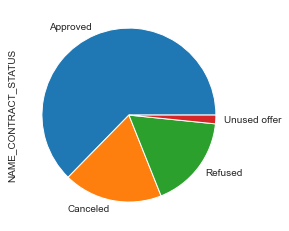

In [236]:
merged_df.NAME_CONTRACT_STATUS.value_counts().plot.pie()

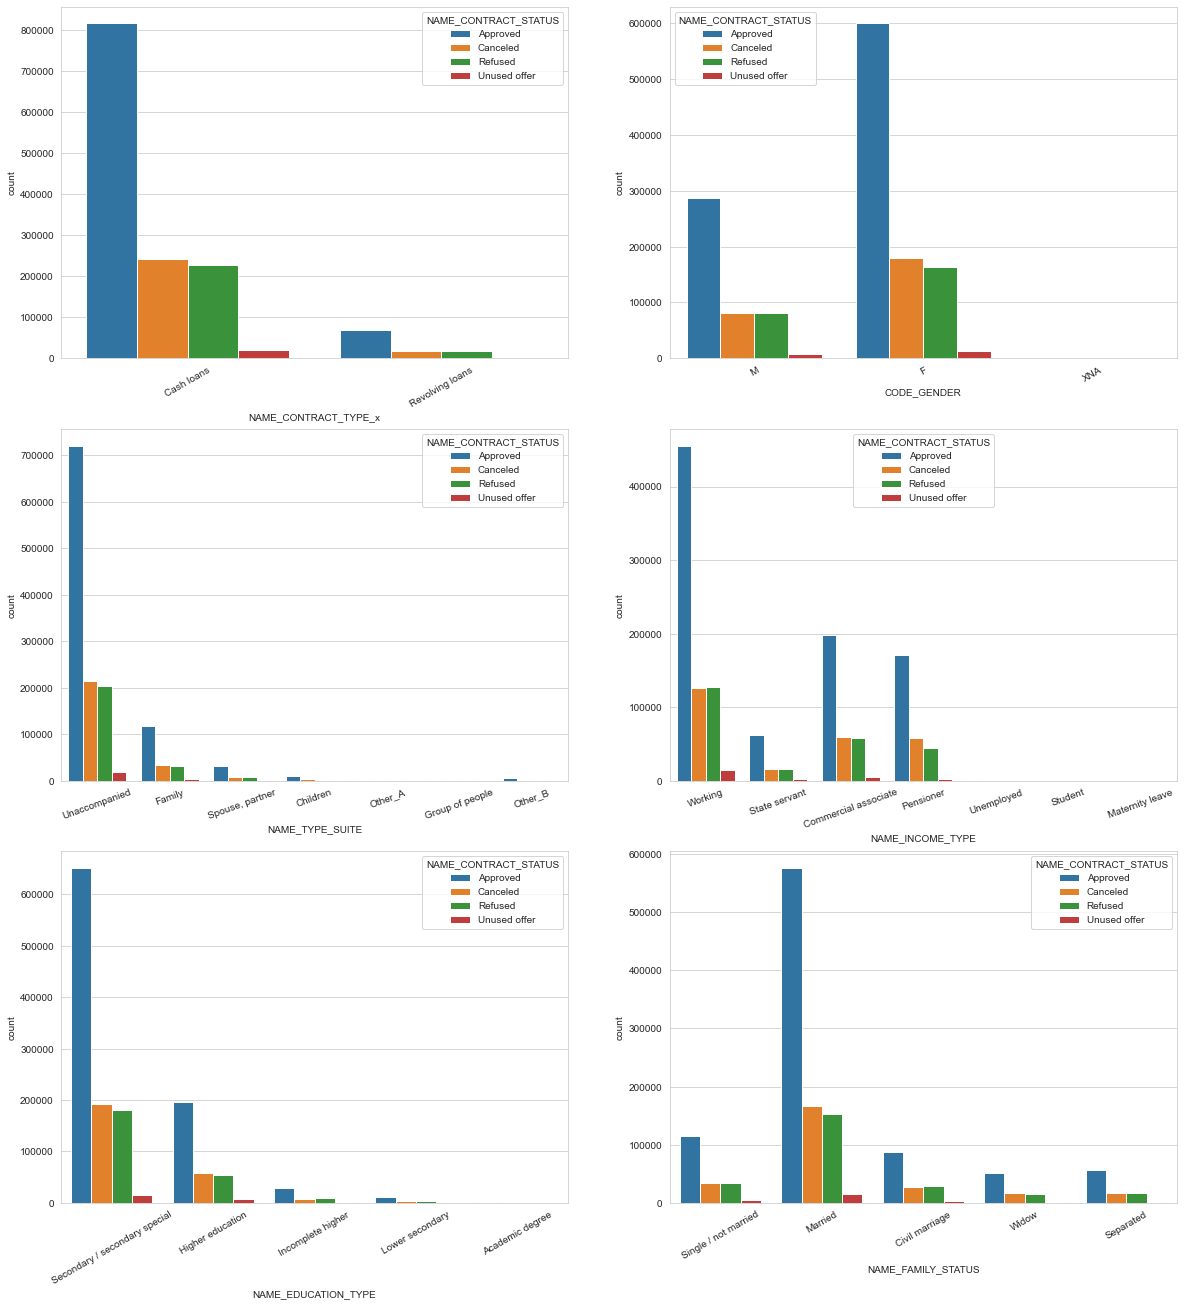

In [237]:
#Univariate analysis on categorical variables
plt.figure(figsize = (20,22))

plt.subplot(3,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE_x', hue = 'NAME_CONTRACT_STATUS', data = merged_df)
plt.xticks(rotation = 30)

plt.subplot(3,2,2)
sns.countplot(x = 'CODE_GENDER', hue = 'NAME_CONTRACT_STATUS', data = merged_df)
plt.xticks(rotation = 30)

plt.subplot(3,2,3)
sns.countplot(x = 'NAME_TYPE_SUITE', hue = 'NAME_CONTRACT_STATUS', data = merged_df)
plt.xticks(rotation = 20)

plt.subplot(3,2,4)
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'NAME_CONTRACT_STATUS', data = merged_df)
plt.xticks(rotation = 20)

plt.subplot(3,2,5)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_STATUS', data = merged_df)
plt.xticks(rotation = 30)

plt.subplot(3,2,6)
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'NAME_CONTRACT_STATUS', data = merged_df)
plt.xticks(rotation = 30)

plt.show()

points infer from the graph
#Loan refused rate is higher for working people who are either single or civil married
#loan refused rate is higher for married people
#loan refused is higher for higher education people
#loan refued rate is higher for workig people
#cash loans refused rate is higher than revolving loans

In [238]:
df2.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [247]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 98 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413701 non-null  int64  
 1   TARGET                        1413701 non-null  int32  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   CODE_GENDER                   1413701 non-null  object 
 4   FLAG_OWN_CAR                  1413701 non-null  object 
 5   FLAG_OWN_REALTY               1413701 non-null  object 
 6   CNT_CHILDREN                  1413701 non-null  int64  
 7   AMT_INCOME_TOTAL              1413701 non-null  float64
 8   AMT_CREDIT_x                  1413701 non-null  float64
 9   AMT_ANNUITY_x                 1413701 non-null  float64
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64
 11  NAME_TYPE_SUITE               1413701 non-null  object 
 12  NAME_INCOME_TYPE            

In [248]:
merged_df.NAME_CONTRACT_TYPE_x          

0               Cash loans
1               Cash loans
2               Cash loans
3               Cash loans
4          Revolving loans
                ...       
1413696         Cash loans
1413697         Cash loans
1413698         Cash loans
1413699         Cash loans
1413700         Cash loans
Name: NAME_CONTRACT_TYPE_x, Length: 1413701, dtype: object

In [249]:
merged_df.NAME_CONTRACT_STATUS

0          Approved
1          Approved
2          Approved
3          Approved
4          Approved
             ...   
1413696    Approved
1413697     Refused
1413698     Refused
1413699    Approved
1413700    Approved
Name: NAME_CONTRACT_STATUS, Length: 1413701, dtype: object

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

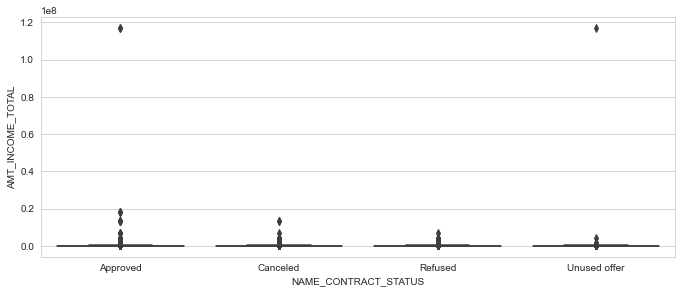

In [241]:
plt.figure(1,figsize=(25,15))

plt.subplot(3,2,1)
sns.boxplot(data=merged_df,x="NAME_CONTRACT_STATUS",y="AMT_INCOME_TOTAL")

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_CREDIT_x'>

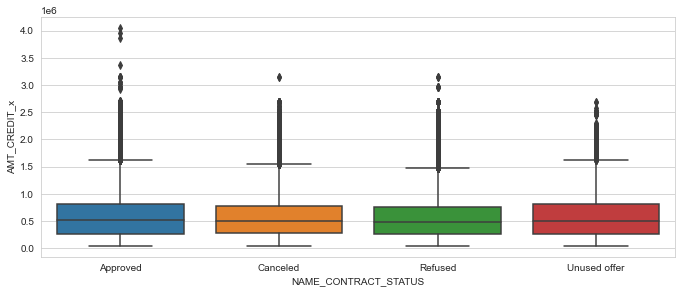

In [242]:
plt.figure(1,figsize=(25,15))
plt.subplot(3,2,2)
sns.boxplot(data=merged_df,x="NAME_CONTRACT_STATUS",y="AMT_CREDIT_x")


<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_GOODS_PRICE_x'>

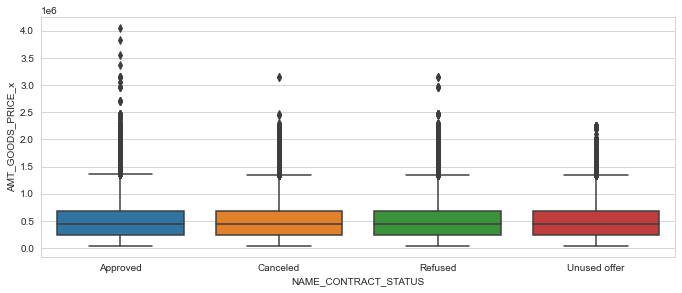

In [243]:
plt.figure(1,figsize=(25,15))
plt.subplot(3,2,3)
sns.boxplot(data=merged_df,x="NAME_CONTRACT_STATUS",y="AMT_GOODS_PRICE_x")

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_ANNUITY_x'>

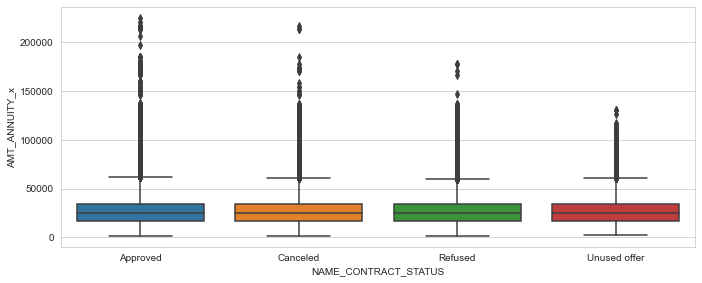

In [244]:
plt.figure(1,figsize=(25,15))
plt.subplot(3,2,4)
sns.boxplot(data=merged_df,x="NAME_CONTRACT_STATUS",y="AMT_ANNUITY_x")

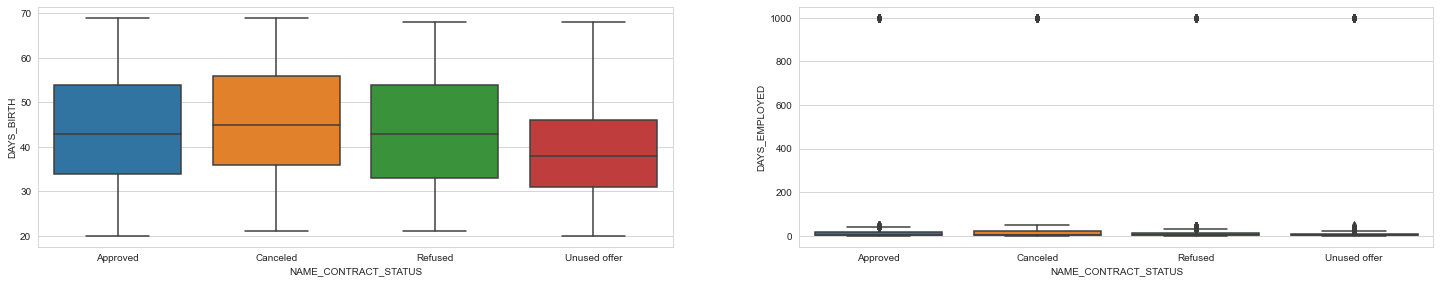

In [245]:
plt.figure(1,figsize=(25,15))
plt.subplot(3,2,5)
sns.boxplot(data=merged_df,x="NAME_CONTRACT_STATUS",y="DAYS_BIRTH")

plt.subplot(3,2,6)
sns.boxplot(data=merged_df,x="NAME_CONTRACT_STATUS",y="DAYS_EMPLOYED")

plt.show()

In [246]:
merged_df.DAYS_BIRTH.describe()

count    1.413701e+06
mean     4.421384e+01
std      1.190217e+01
min      2.000000e+01
25%      3.400000e+01
50%      4.300000e+01
75%      5.400000e+01
max      6.900000e+01
Name: DAYS_BIRTH, dtype: float64

Information infers frome the graph
All variables seem to follow a similar distribution for all cases except for CLIENT_AGE where all four cases have a similar distribution but in different age ranges, for example, lower age range for Unused Offers with a small spread while higher age range for Cancelled loans with a larger spread

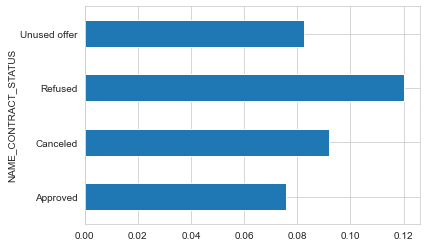

In [240]:
#Plotting NAME_CONTRACT_STATUS against percentage of clients having payment difficulties
merged_df['TARGET'] = merged_df['TARGET'].astype(int)
merged_df.groupby("NAME_CONTRACT_STATUS")["TARGET"].mean().plot.barh()
plt.show()

# Multivariate Analysis

imformation infers from the graph
refused loan category of people having more difficulty in making payments with the highest percentage, that is 12%

In [250]:
#Plotting Contract type vs Previous contact status vs Target variable
result1 = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="NAME_CONTRACT_TYPE_x",values="TARGET")
result1

NAME_CONTRACT_TYPE_x  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                             
Approved                0.078105         0.049836
Canceled                0.094178         0.058751
Refused                 0.123735         0.069429
Unused offer            0.084637         0.061972

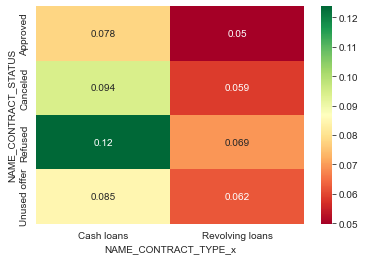

In [251]:
sns.heatmap(result1,annot=True,cmap="RdYlGn")
plt.show()

cash loans are higher rate of refused as compare to revolving loans and higher rate of having payment difficulty

In [253]:
#Plotting Gender vs Previous contact status vs Target variable
result2 = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="CODE_GENDER",values="TARGET")
result2

CODE_GENDER                  F         M  XNA
NAME_CONTRACT_STATUS                         
Approved              0.066552  0.095331  0.0
Canceled              0.080927  0.115813  0.0
Refused               0.107053  0.145693  0.0
Unused offer          0.072316  0.099337  NaN

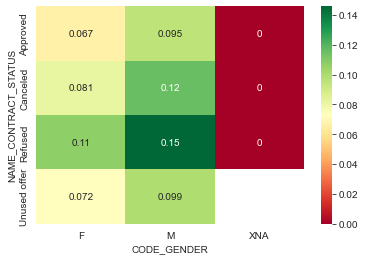

In [254]:
sns.heatmap(result2,annot=True,cmap="RdYlGn")
plt.show()

approved loan rate are higher for civil marrige followed by single/not married and seprated.Widow having comparatively lesser risk for defaulting the payments

In [255]:
#Plotting Family status vs Previous contact status vs Target variable
result3 = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="NAME_FAMILY_STATUS",values="TARGET")
result3

NAME_FAMILY_STATUS    Civil marriage   Married  Separated  \
NAME_CONTRACT_STATUS                                        
Approved                    0.090594  0.072763   0.074784   
Canceled                    0.107754  0.089647   0.089991   
Refused                     0.138100  0.117785   0.114933   
Unused offer                0.093830  0.075280   0.080000   

NAME_FAMILY_STATUS    Single / not married     Widow  
NAME_CONTRACT_STATUS                                  
Approved                          0.090425  0.054470  
Canceled                          0.106577  0.058473  
Refused                           0.133413  0.080761  
Unused offer                      0.107545  0.060927

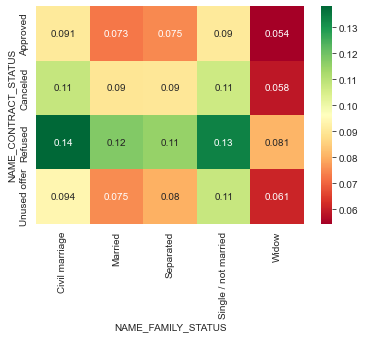

In [256]:
sns.heatmap(result3,annot=True,cmap="RdYlGn")
plt.show()

clients who previousely unused the offer and having academic degree, leads higher rate of payment difficulty

In [258]:
result4 = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="NAME_EDUCATION_TYPE",values="TARGET")
result4

NAME_EDUCATION_TYPE   Academic degree  Higher education  Incomplete higher  \
NAME_CONTRACT_STATUS                                                         
Approved                     0.014354          0.052282           0.077649   
Canceled                     0.000000          0.064197           0.101554   
Refused                      0.010989          0.085401           0.117082   
Unused offer                 0.500000          0.066687           0.099695   

NAME_EDUCATION_TYPE   Lower secondary  Secondary / secondary special  
NAME_CONTRACT_STATUS                                                  
Approved                     0.095434                       0.082583  
Canceled                     0.125847                       0.099024  
Refused                      0.139684                       0.130231  
Unused offer                 0.115152                       0.087992

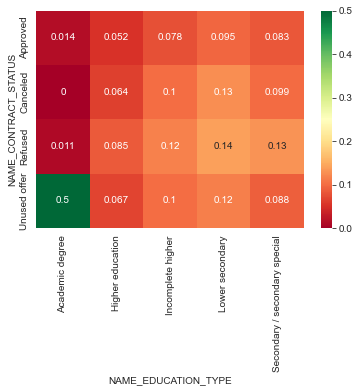

In [259]:
sns.heatmap(result4,annot=True,cmap="RdYlGn")
plt.show()

male have higher rate of refused loans as comapare to female

# Conclusion
Based on the analysis above, the factors that affect the most are:
1. Previously refused loans
2. Client age
3. Family status
4. Contract type
5. Client's gender
6. Client's education level
7. Loan amount

Recommendations for the bank:
1. Avoid sanctioning loans to clients whose applications were rejected earlier
2. Avoid sanctioning loans to the age group of 17 to 35 and to sanction more loans to the age band of 55 and above
3. Prefer sanctioning loans to widows and avoid to sanction it to unmarried and civil married people
4. Sanctioning revolving loans is a much better option than cash loans, so revolving loans could be used to hedge the risks of cash loans
5. Females should be preferred over males
6. Client's completed education till lower secondary should be avoided
